# Univariate Statistics

In [1]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
from scipy import stats  
import matplotlib.pyplot as plt
import eda as ed
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

In [10]:
import matplotlib as plt
plt.rcParams.update({'figure.max_open_warning': 0})

In [2]:
df = pd.read_csv("housing_full.csv")
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [3]:
df.dropna(axis=1, inplace=True)
df.columns = df.columns.str.strip()
df

Id  MSSubClass MSZoning  LotArea Street LotShape LandContour  \
0        1          60       RL     8450   Pave      Reg         Lvl   
1        2          20       RL     9600   Pave      Reg         Lvl   
2        3          60       RL    11250   Pave      IR1         Lvl   
3        4          70       RL     9550   Pave      IR1         Lvl   
4        5          60       RL    14260   Pave      IR1         Lvl   
...    ...         ...      ...      ...    ...      ...         ...   
1455  1456          60       RL     7917   Pave      Reg         Lvl   
1456  1457          20       RL    13175   Pave      Reg         Lvl   
1457  1458          70       RL     9042   Pave      Reg         Lvl   
1458  1459          20       RL     9717   Pave      Reg         Lvl   
1459  1460          20       RL     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0       AllPub    Inside       Gtl  ...             0         0           0   
1       AllPub       FR2       Gtl  ...             0         0           0   
2       AllPub    Inside       Gtl  ...             0         0           0   
3       AllPub    Corner       Gtl  ...           272         0           0   
4       AllPub       FR2       Gtl  ...             0         0           0   
...        ...       ...       ...  ...           ...       ...         ...   
1455    AllPub    Inside       Gtl  ...             0         0           0   
1456    AllPub    Inside       Gtl  ...             0         0           0   
1457    AllPub    Inside       Gtl  ...             0         0           0   
1458    AllPub    Inside       Gtl  ...           112         0           0   
1459    AllPub    Inside       Gtl  ...             0         0           0   

     PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0           0       0       2    2008        WD         Normal    208500  
1           0       0       5    2007        WD         Normal    181500  
2           0       0       9    2008        WD         Normal    223500  
3           0       0       2    2006        WD        Abnorml    140000  
4           0       0      12    2008        WD         Normal    250000  
...       ...     ...     ...     ...       ...            ...       ...  
1455        0       0       8    2007        WD         Normal    175000  
1456        0       0       2    2010        WD         Normal    210000  
1457        0    2500       5    2010        WD         Normal    266500  
1458        0       0       4    2010        WD         Normal    142125  
1459        0       0       6    2008        WD         Normal    147500  

[1460 rows x 62 columns]

In [4]:
ed.df_problem_solver1(df)

In [5]:
df

Id  MSSubClass MSZoning  LotArea Street LotShape LandContour  \
0        1          60       RL     8450   Pave      Reg         Lvl   
1        2          20       RL     9600   Pave      Reg         Lvl   
2        3          60       RL    11250   Pave      IR1         Lvl   
3        4          70       RL     9550   Pave      IR1         Lvl   
4        5          60       RL    14260   Pave      IR1         Lvl   
...    ...         ...      ...      ...    ...      ...         ...   
1455  1456          60       RL     7917   Pave      Reg         Lvl   
1456  1457          20       RL    13175   Pave      Reg         Lvl   
1457  1458          70       RL     9042   Pave      Reg         Lvl   
1458  1459          20       RL     9717   Pave      Reg         Lvl   
1459  1460          20       RL     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... EnclosedPorch A_3SsnPorch ScreenPorch  \
0       AllPub    Inside       Gtl  ...             0           0           0   
1       AllPub       FR2       Gtl  ...             0           0           0   
2       AllPub    Inside       Gtl  ...             0           0           0   
3       AllPub    Corner       Gtl  ...           272           0           0   
4       AllPub       FR2       Gtl  ...             0           0           0   
...        ...       ...       ...  ...           ...         ...         ...   
1455    AllPub    Inside       Gtl  ...             0           0           0   
1456    AllPub    Inside       Gtl  ...             0           0           0   
1457    AllPub    Inside       Gtl  ...             0           0           0   
1458    AllPub    Inside       Gtl  ...           112           0           0   
1459    AllPub    Inside       Gtl  ...             0           0           0   

     PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0           0       0       2    2008        WD         Normal    208500  
1           0       0       5    2007        WD         Normal    181500  
2           0       0       9    2008        WD         Normal    223500  
3           0       0       2    2006        WD        Abnorml    140000  
4           0       0      12    2008        WD         Normal    250000  
...       ...     ...     ...     ...       ...            ...       ...  
1455        0       0       8    2007        WD         Normal    175000  
1456        0       0       2    2010        WD         Normal    210000  
1457        0    2500       5    2010        WD         Normal    266500  
1458        0       0       4    2010        WD         Normal    142125  
1459        0       0       6    2008        WD         Normal    147500  

[1460 rows x 62 columns]

In [6]:
#testing the function
pd.set_option("display.max_rows",100)
pd.set_option("display.max_columns",100)
ed.unistats(df ,"Unique")

Count Missing Unique   Dtype    Mode          Mean    Min  \
BsmtHalfBath   1460       0      3   int64       0      0.057534      0   
HalfBath       1460       0      3   int64       0      0.382877      0   
BsmtFullBath   1460       0      4   int64       0      0.425342      0   
FullBath       1460       0      4   int64       2      1.565068      0   
KitchenAbvGr   1460       0      4   int64       1      1.046575      0   
Fireplaces     1460       0      4   int64       0      0.613014      0   
GarageCars     1460       0      5   int64       2      1.767123      0   
YrSold         1460       0      5   int64    2009   2007.815753   2006   
BedroomAbvGr   1460       0      8   int64       3      2.866438      0   
PoolArea       1460       0      8   int64       0      2.758904      0   
OverallCond    1460       0      9   int64       5      5.575342      1   
OverallQual    1460       0     10   int64       5      6.099315      1   
TotRmsAbvGrd   1460       0     12   int64       6      6.517808      2   
MoSold         1460       0     12   int64       6      6.321918      1   
MSSubClass     1460       0     15   int64      20      56.89726     20   
A_3SsnPorch    1460       0     20   int64       0      3.409589      0   
MiscVal        1460       0     21   int64       0     43.489041      0   
LowQualFinSF   1460       0     24   int64       0      5.844521      0   
YearRemodAdd   1460       0     61   int64    1950   1984.865753   1950   
ScreenPorch    1460       0     76   int64       0     15.060959      0   
YearBuilt      1460       0    112   int64    2006   1971.267808   1872   
EnclosedPorch  1460       0    120   int64       0      21.95411      0   
BsmtFinSF2     1460       0    144   int64       0     46.549315      0   
OpenPorchSF    1460       0    202   int64       0     46.660274      0   
WoodDeckSF     1460       0    274   int64       0     94.244521      0   
A_2ndFlrSF     1460       0    417   int64       0    346.992466      0   
GarageArea     1460       0    441   int64       0    472.980137      0   
BsmtFinSF1     1460       0    637   int64       0    443.639726      0   
SalePrice      1460       0    663   int64  140000  180921.19589  34900   
TotalBsmtSF    1460       0    721   int64       0   1057.429452      0   
A_1stFlrSF     1460       0    753   int64     864   1162.626712    334   
BsmtUnfSF      1460       0    780   int64       0    567.240411      0   
TotalSF        1460       0    861   int64     864   1515.463699    334   
LotArea        1460       0   1073   int64    7200  10516.828082   1300   
Id             1460       0   1460   int64       1         730.5      1   
Street         1460       0      2  object       -             -      -   
Utilities      1460       0      2  object       -             -      -   
CentralAir     1460       0      2  object       -             -      -   
LandSlope      1460       0      3  object       -             -      -   
PavedDrive     1460       0      3  object       -             -      -   
LotShape       1460       0      4  object       -             -      -   
LandContour    1460       0      4  object       -             -      -   
ExterQual      1460       0      4  object       -             -      -   
KitchenQual    1460       0      4  object       -             -      -   
MSZoning       1460       0      5  object       -             -      -   
LotConfig      1460       0      5  object       -             -      -   
BldgType       1460       0      5  object       -             -      -   
ExterCond      1460       0      5  object       -             -      -   
HeatingQC      1460       0      5  object       -             -      -   
RoofStyle      1460       0      6  object       -             -      -   
Foundation     1460       0      6  object       -             -      -   
Heating        1460       0      6  object       -             -      -   
SaleCondition  1460       0      6  obj

check **skew** , and **unique** column 

# Bivariate Statistics

Numeric to Numeric: **Correlation** 


Numeric to Categorical: **one-way ANOVA** (3+groups)or **t-test** (2 groups)


Categorical to Categorical: **Chi-square**

In [7]:
ed.correlation(df,"SalePrice")

Columns  P-Value  Correlation Coefficient(r)  \
OverallQual      SalePrice-OverallQual   0.0000                    0.790982   
TotalSF              SalePrice-TotalSF   0.0000                    0.708624   
GarageCars        SalePrice-GarageCars   0.0000                    0.640409   
GarageArea        SalePrice-GarageArea   0.0000                    0.623431   
TotalBsmtSF      SalePrice-TotalBsmtSF   0.0000                    0.613581   
A_1stFlrSF        SalePrice-A_1stFlrSF   0.0000                    0.605852   
FullBath            SalePrice-FullBath   0.0000                    0.560664   
TotRmsAbvGrd    SalePrice-TotRmsAbvGrd   0.0000                    0.533723   
YearBuilt          SalePrice-YearBuilt   0.0000                    0.522897   
YearRemodAdd    SalePrice-YearRemodAdd   0.0000                    0.507101   
Fireplaces        SalePrice-Fireplaces   0.0000                    0.466929   
BsmtFinSF1        SalePrice-BsmtFinSF1   0.0000                    0.386420   
WoodDeckSF        SalePrice-WoodDeckSF   0.0000                    0.324413   
A_2ndFlrSF        SalePrice-A_2ndFlrSF   0.0000                    0.319334   
OpenPorchSF      SalePrice-OpenPorchSF   0.0000                    0.315856   
HalfBath            SalePrice-HalfBath   0.0000                    0.284108   
LotArea              SalePrice-LotArea   0.0000                    0.263843   
BsmtFullBath    SalePrice-BsmtFullBath   0.0000                    0.227122   
BsmtUnfSF          SalePrice-BsmtUnfSF   0.0000                    0.214479   
BedroomAbvGr    SalePrice-BedroomAbvGr   0.0000                    0.168213   
KitchenAbvGr    SalePrice-KitchenAbvGr   0.0000                   -0.135907   
EnclosedPorch  SalePrice-EnclosedPorch   0.0000                   -0.128578   
ScreenPorch      SalePrice-ScreenPorch   0.0000                    0.111447   
PoolArea            SalePrice-PoolArea   0.0004                    0.092404   
MSSubClass        SalePrice-MSSubClass   0.0013                   -0.084284   
OverallCond      SalePrice-OverallCond   0.0029                   -0.077856   
MoSold                SalePrice-MoSold   0.0761                    0.046432   
A_3SsnPorch      SalePrice-A_3SsnPorch   0.0886                    0.044584   
YrSold                SalePrice-YrSold   0.2694                   -0.028923   
LowQualFinSF    SalePrice-LowQualFinSF   0.3282                   -0.025606   
Id                        SalePrice-Id   0.4027                   -0.021917   
MiscVal              SalePrice-MiscVal   0.4185                   -0.021190   
BsmtHalfBath    SalePrice-BsmtHalfBath   0.5202                   -0.016844   
BsmtFinSF2        SalePrice-BsmtFinSF2   0.6640                   -0.011378   

               Absolute r  
OverallQual      0.790982  
TotalSF          0.708624  
GarageCars       0.640409  
GarageArea       0.623431  
TotalBsmtSF      0.613581  
A_1stFlrSF       0.605852  
FullBath         0.560664  
TotRmsAbvGrd     0.533723  
YearBuilt        0.522897  
YearRemodAdd     0.507101  
Fireplaces       0.466929  
BsmtFinSF1       0.386420  
WoodDeckSF       0.324413  
A_2ndFlrSF       0.319334  
OpenPorchSF      0.315856  
HalfBath         0.284108  
LotArea          0.263843  
BsmtFullBath     0.227122  
BsmtUnfSF        0.214479  
BedroomAbvGr     0.168213  
KitchenAbvGr     0.135907  
EnclosedPorch    0.128578  
ScreenPorch      0.111447  
PoolArea         0.092404  
MSSubClass       0.084284  
OverallCond      0.077856  
MoSold           0.046432  
A_3SsnPorch      0.044584  
YrSold           0.028923  
LowQualFinSF     0.025606  
Id               0.021917  
MiscVal          0.021190  
BsmtHalfBath     0.016844  
BsmtFinSF2       0.011378

In [8]:
ed.breush_pagan(df,"SalePrice")

LM_stat  p_value     F_stat  p_value
MSZoning        13.923995  0.00754   3.502481  0.00745
Street           0.132671  0.71568   0.132502  0.71590
LotShape         8.956297  0.02988   2.995630  0.02980
LandContour      5.161225  0.16037   1.721781  0.16059
Utilities        0.117578  0.73168   0.117426  0.73189
LotConfig        3.559070  0.46895   0.888887  0.46977
LandSlope        0.916692  0.63233   0.457692  0.63283
Neighborhood   149.473721  0.00000   6.819614  0.00000
Condition1       8.190115  0.41512   1.023193  0.41614
Condition2       1.341270  0.98730   0.190735  0.98743
BldgType        13.682004  0.00838   3.441034  0.00828
HouseStyle      19.549096  0.00663   2.815119  0.00648
RoofStyle       54.131494  0.00000  11.196949  0.00000
RoofMatl        20.145417  0.00526   2.902192  0.00514
Exterior1st     26.855678  0.02010   1.934132  0.01961
Exterior2nd     59.569207  0.00000   4.094832  0.00000
ExterQual       72.712829  0.00000  25.438107  0.00000
ExterCond        2.469932  0.65003   0.616411  0.65087
Foundation      41.873850  0.00000   8.586624  0.00000
Heating          1.471608  0.91632   0.293408  0.91675
HeatingQC       40.859470  0.00000  10.472981  0.00000
CentralAir       5.808452  0.01595   5.823664  0.01593
KitchenQual    142.018174  0.00000  52.296741  0.00000
Functional       7.469742  0.27958   1.245360  0.28012
PavedDrive       7.406671  0.02464   3.714570  0.02460
SaleType        16.800413  0.03226   2.111402  0.03195
SaleCondition   14.757996  0.01145   2.969486  0.01131

In [9]:
ed.anova(df,"SalePrice")

F_stat  p_value~
ExterQual      443.334831  0.000000
KitchenQual    407.806352  0.000000
Foundation     100.253851  0.000000
CentralAir      98.305344  0.000000
HeatingQC       88.394462  0.000000
Neighborhood    71.784865  0.000000
SaleCondition   45.578428  0.000000
MSZoning        43.840282  0.000000
PavedDrive      42.024179  0.000000
LotShape        40.132852  0.000000
SaleType        28.863054  0.000000
HouseStyle      19.595001  0.000000
Exterior1st     18.611743  0.000000
RoofStyle       17.805497  0.000000
Exterior2nd     17.500840  0.000000
BldgType        13.011077  0.000000
LandContour     12.850188  0.000000
ExterCond        8.798714  0.000001
LotConfig        7.809954  0.000003
RoofMatl         6.727305  0.000000
Condition1       6.118017  0.000000
Heating          4.259819  0.000753
Functional       4.057875  0.000484
Street           2.459290  0.117049
Condition2       2.073899  0.043426
LandSlope        1.958817  0.141396
Utilities        0.298804  0.584717

## Bivariate Visualizations

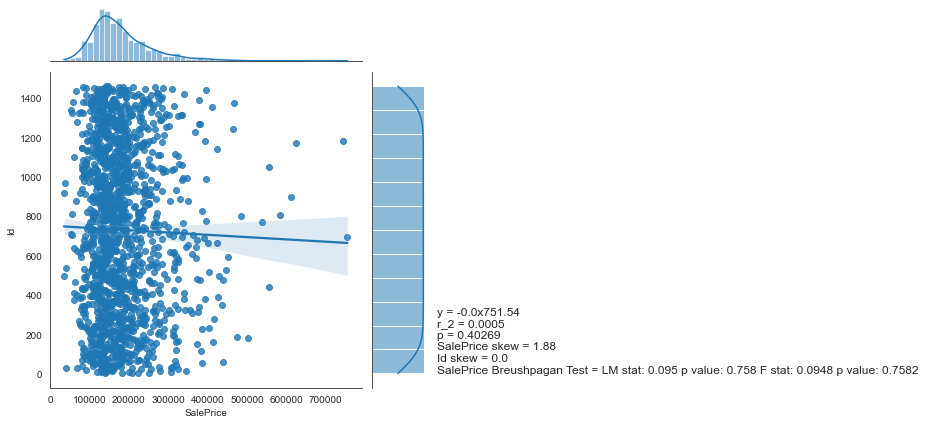

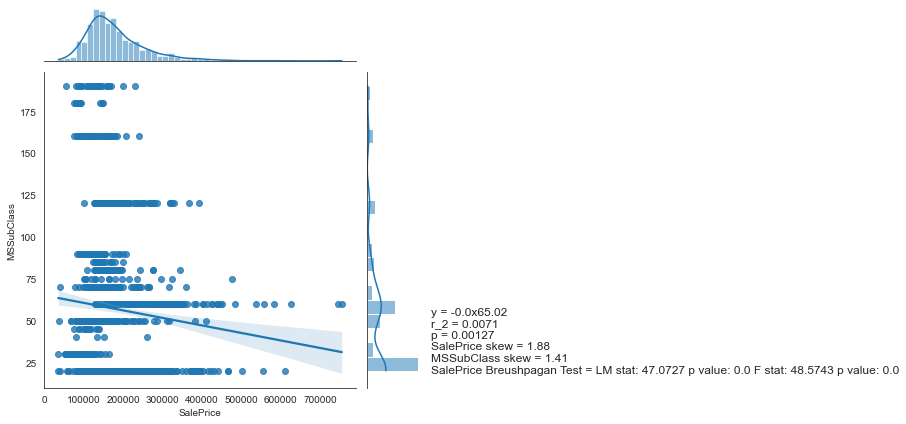

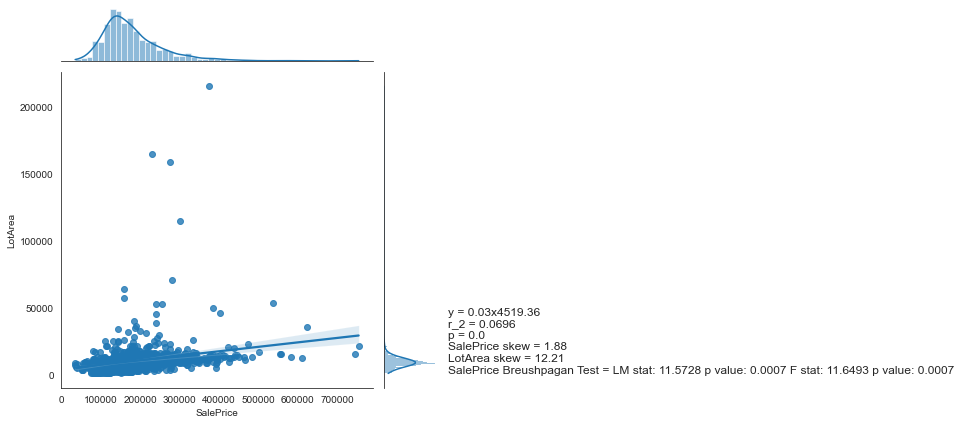

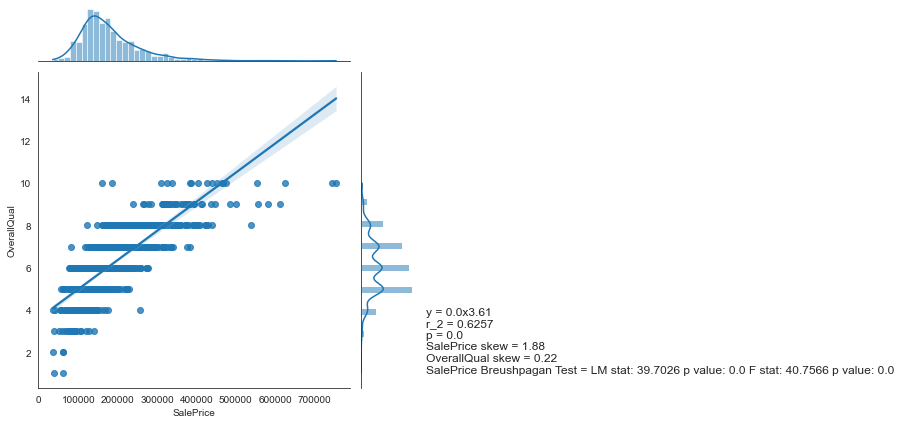

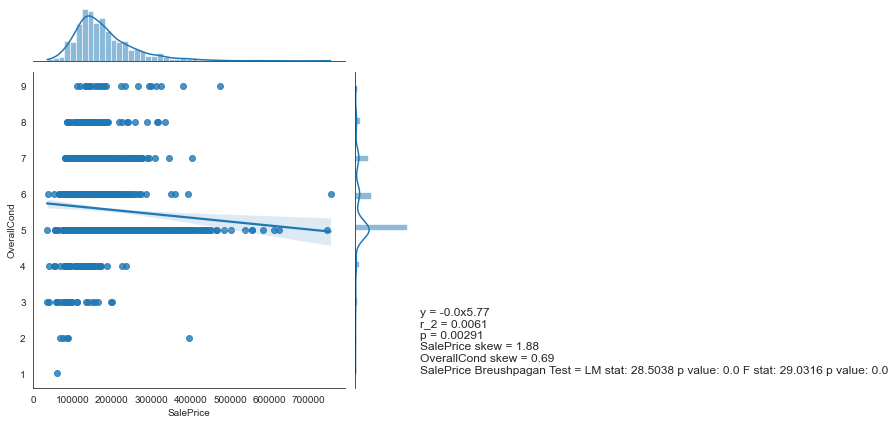

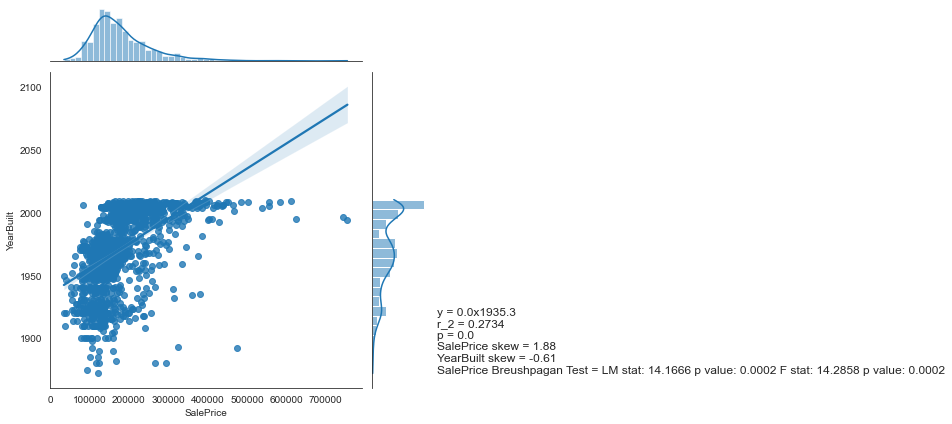

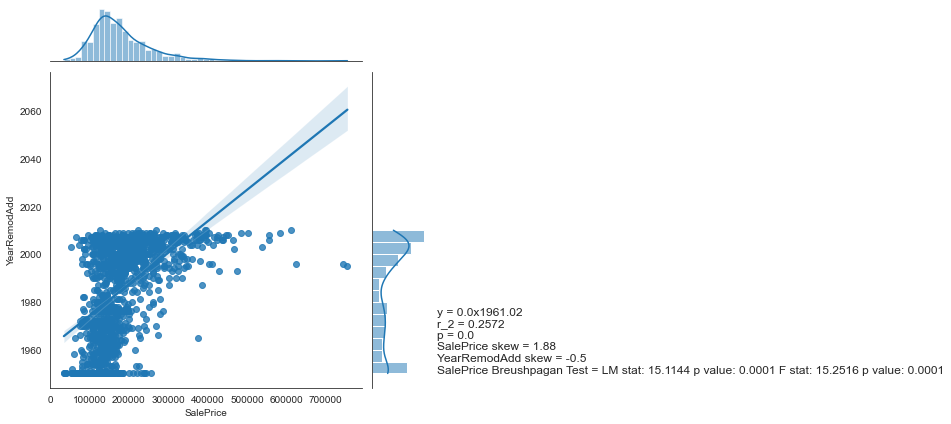

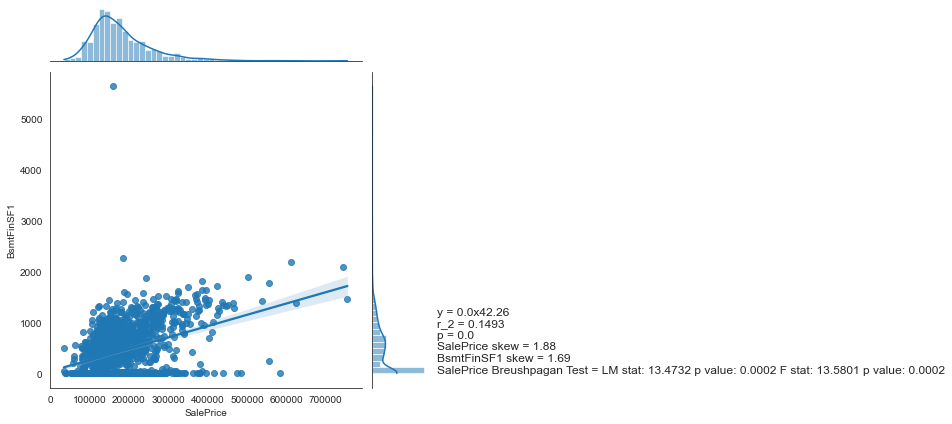

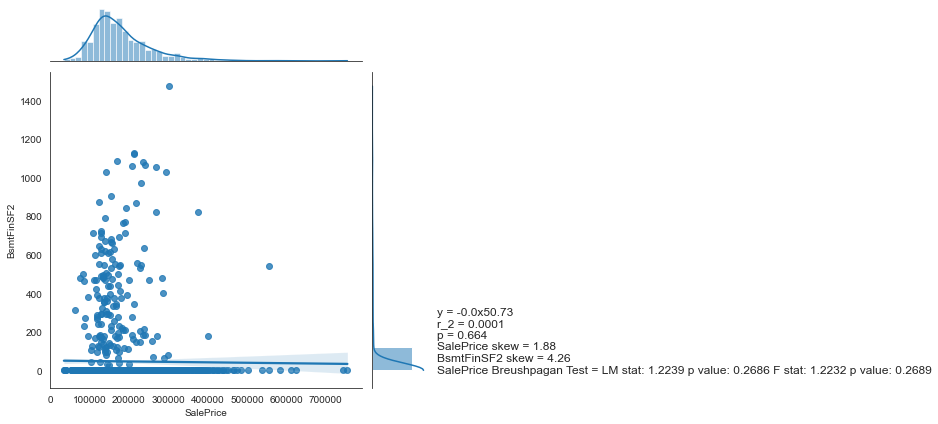

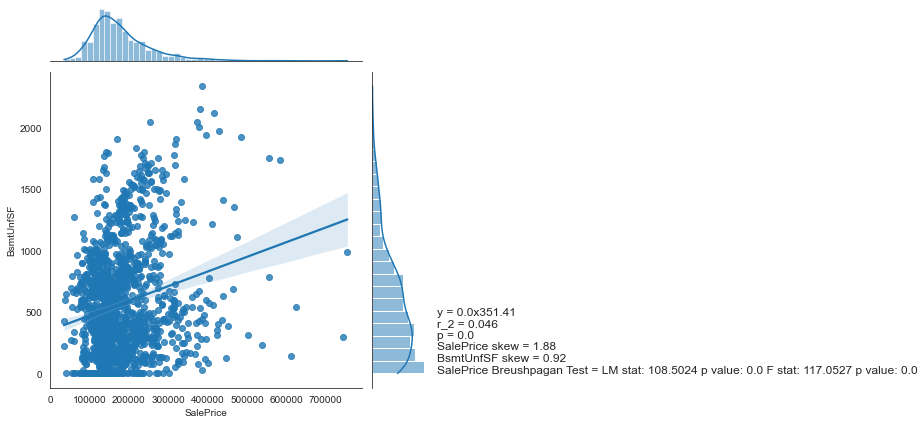

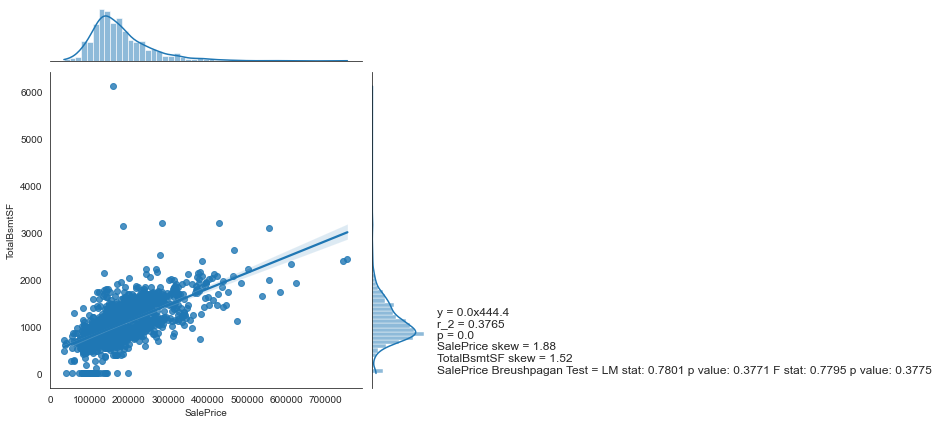

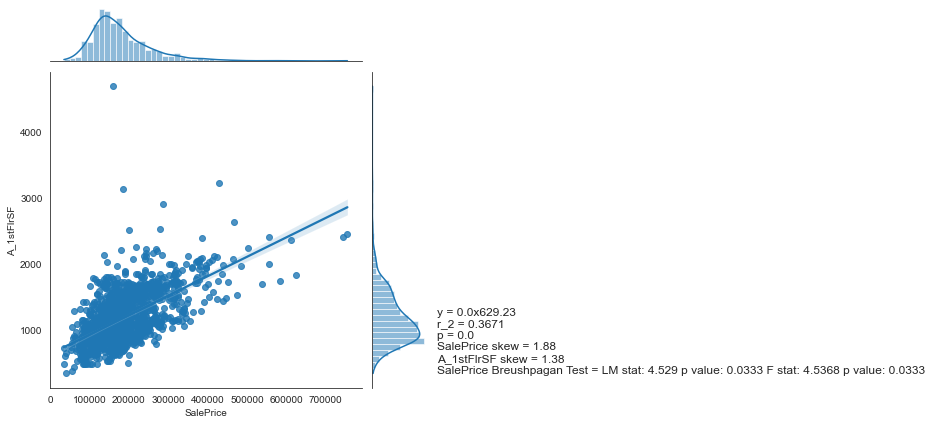

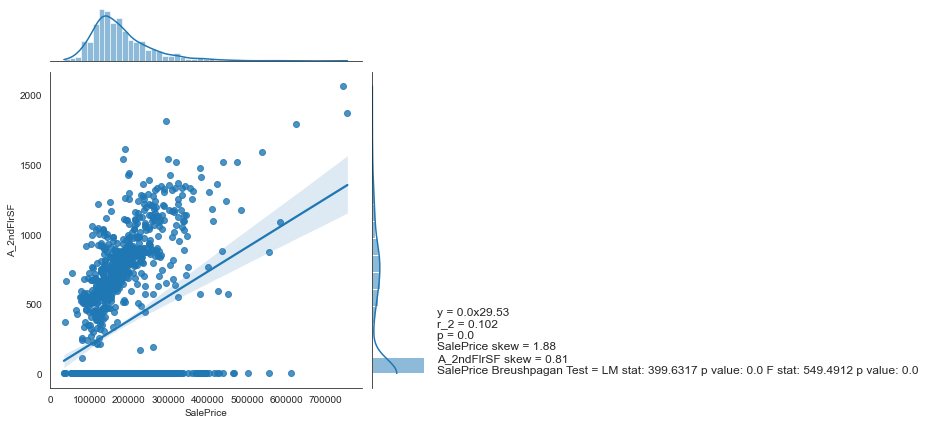

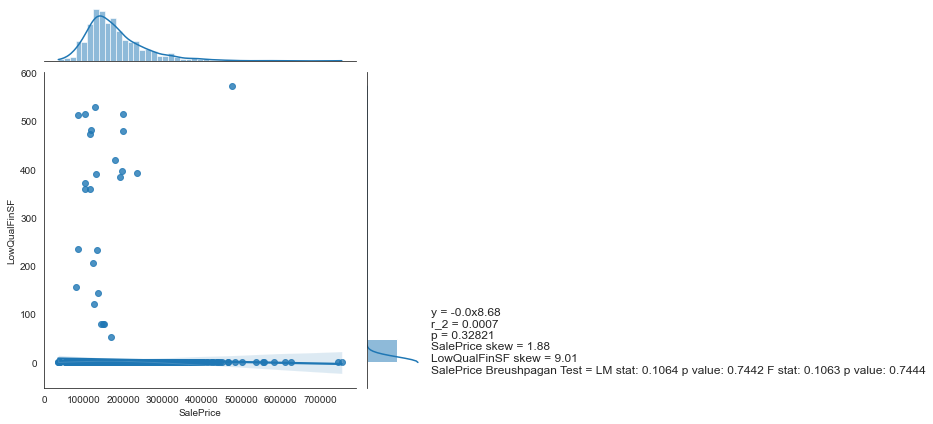

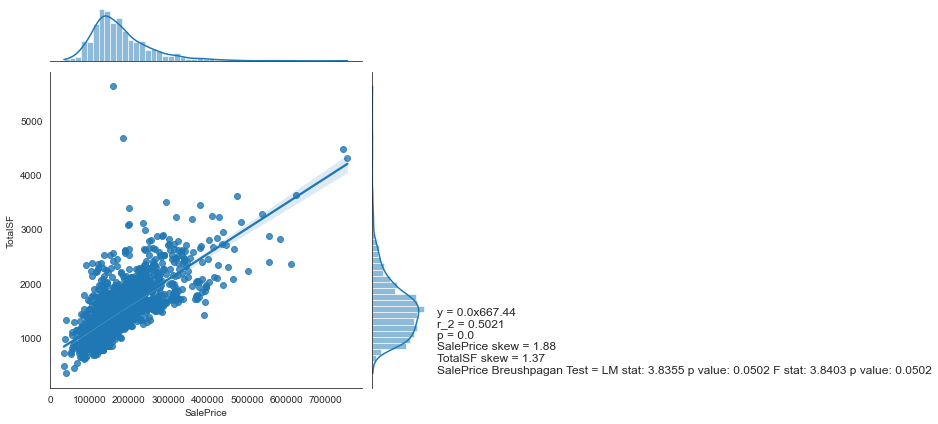

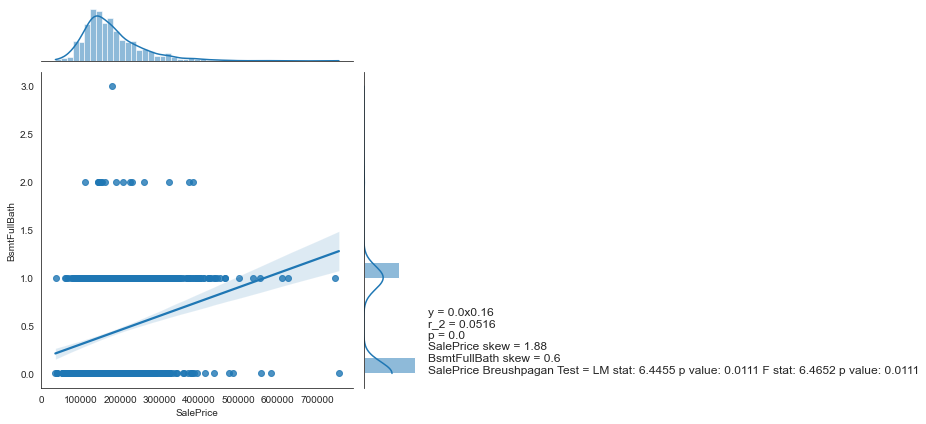

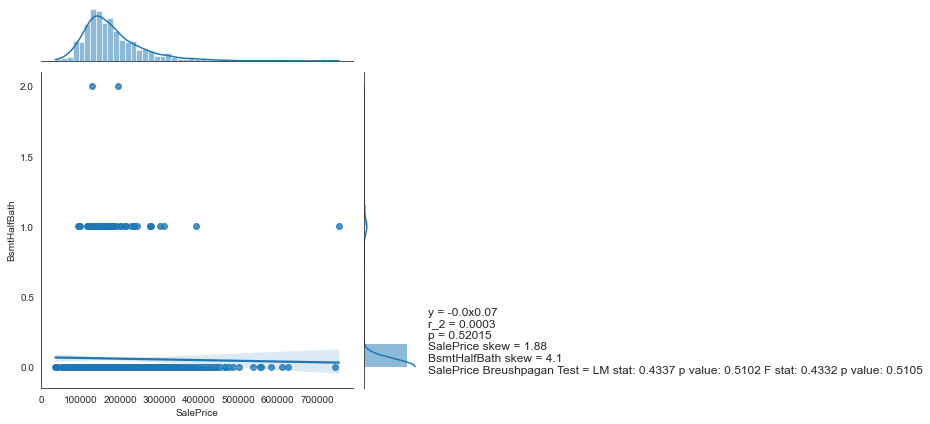

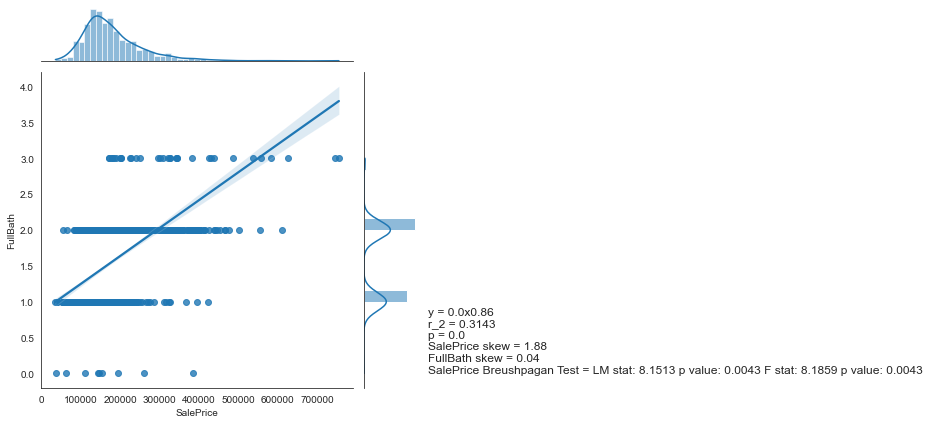

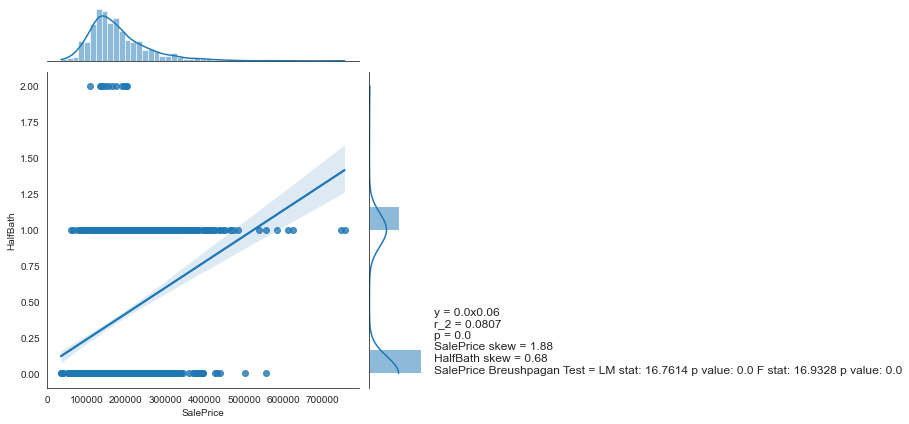

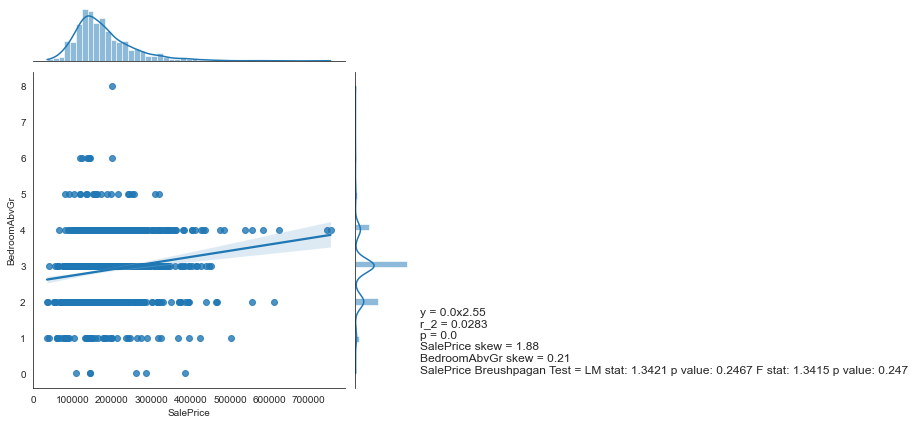

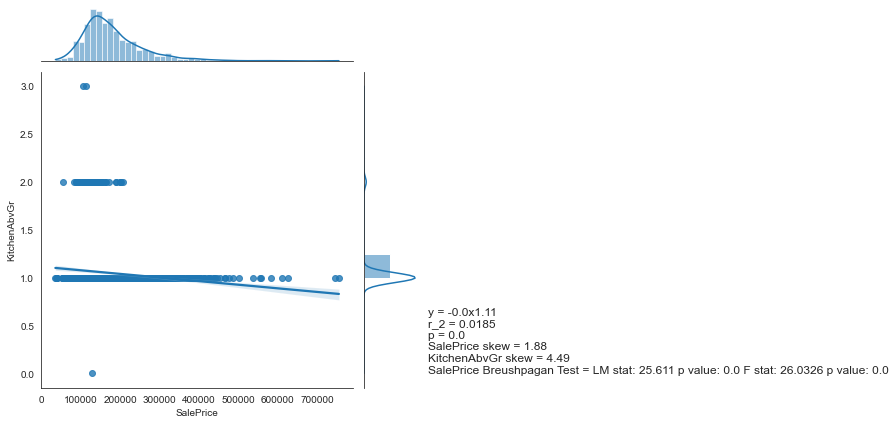

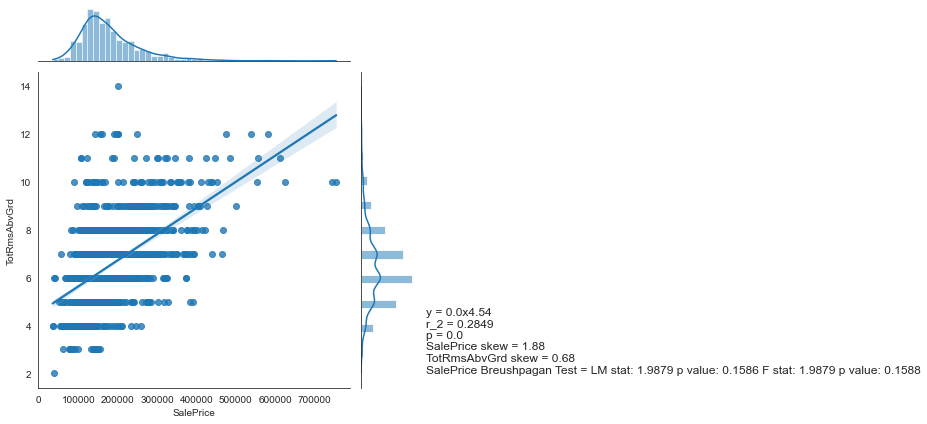

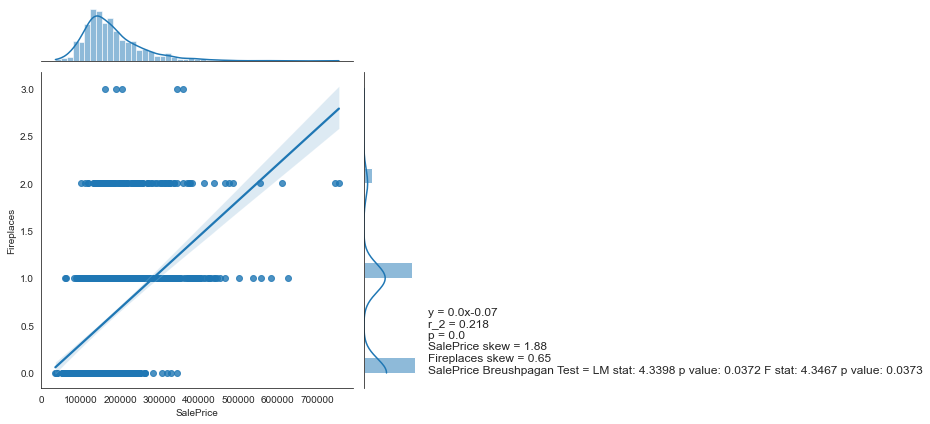

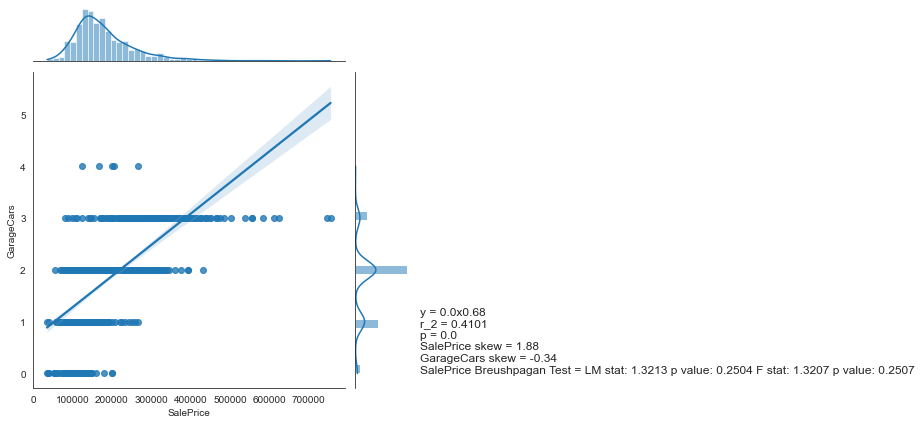

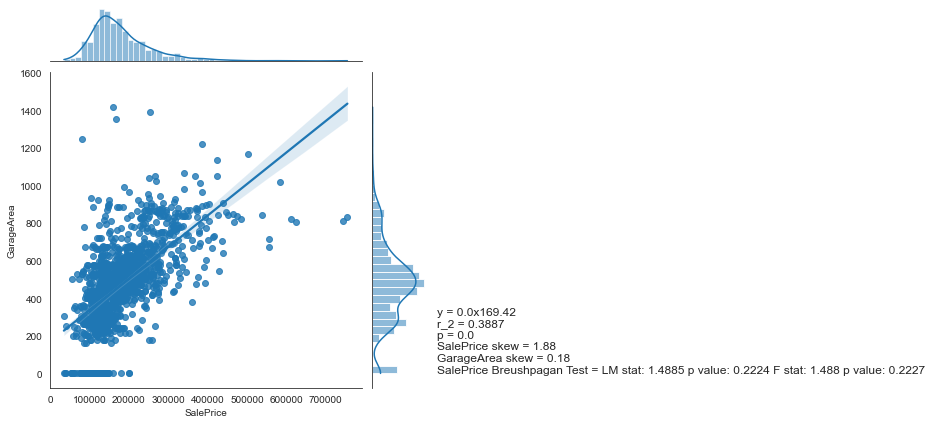

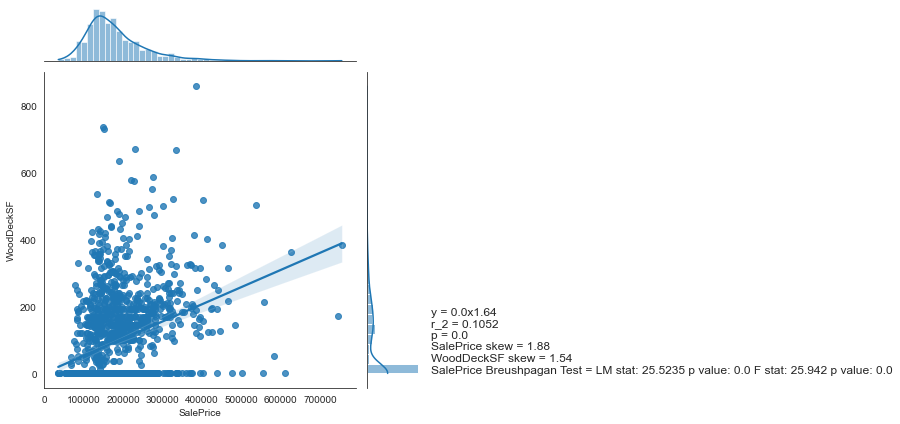

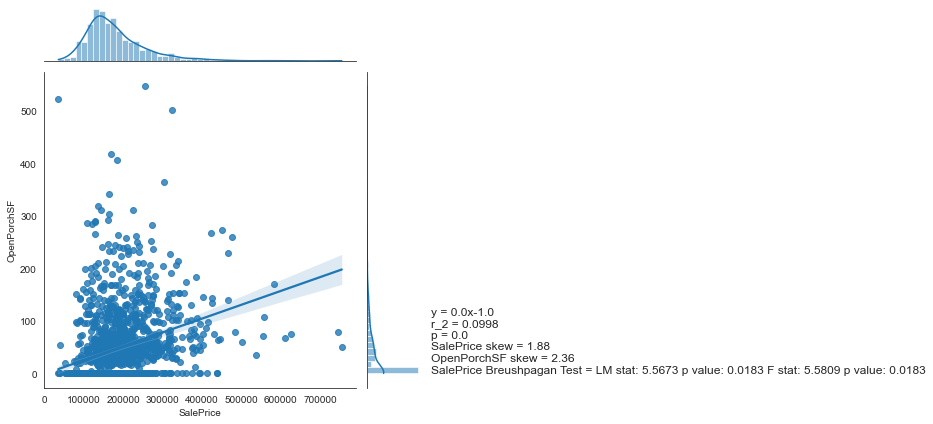

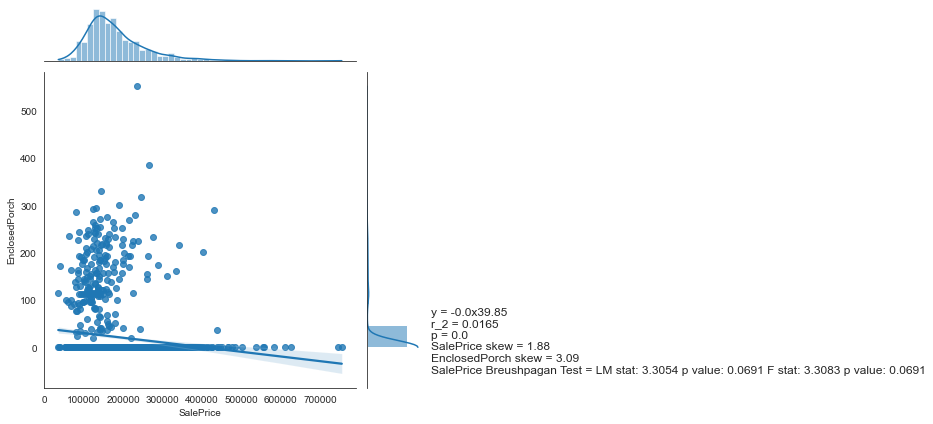

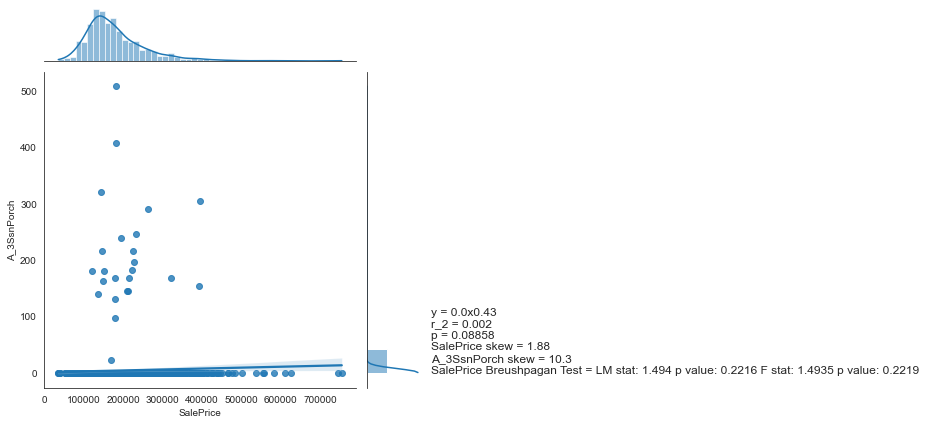

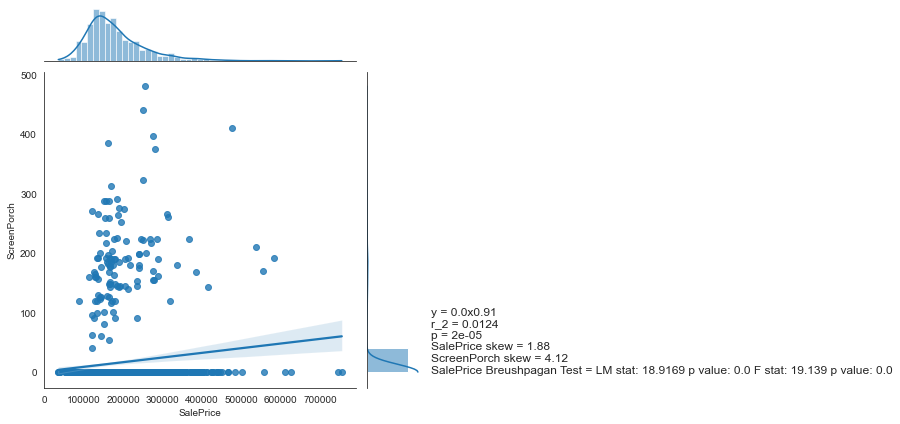

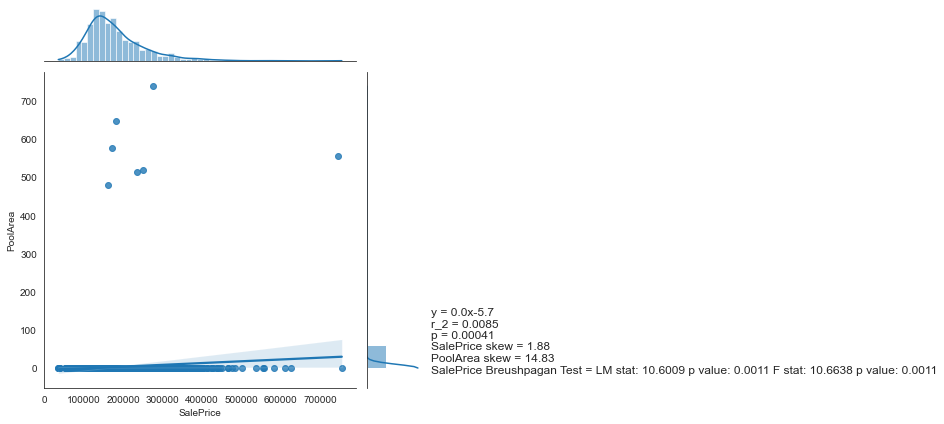

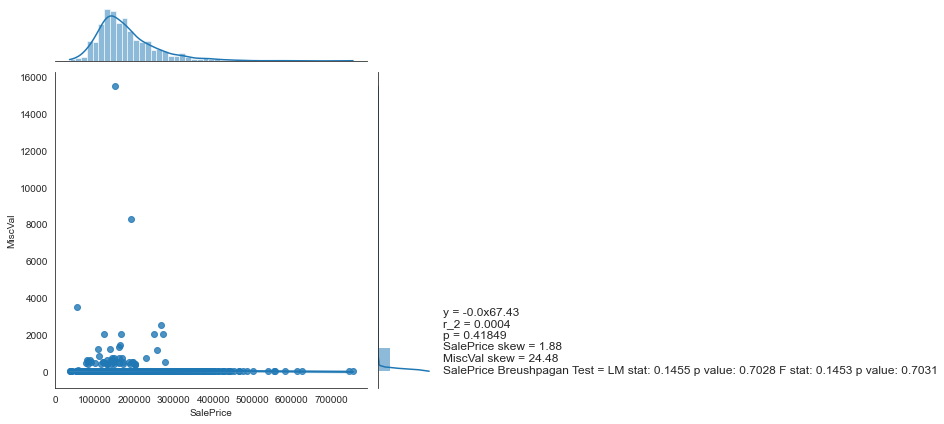

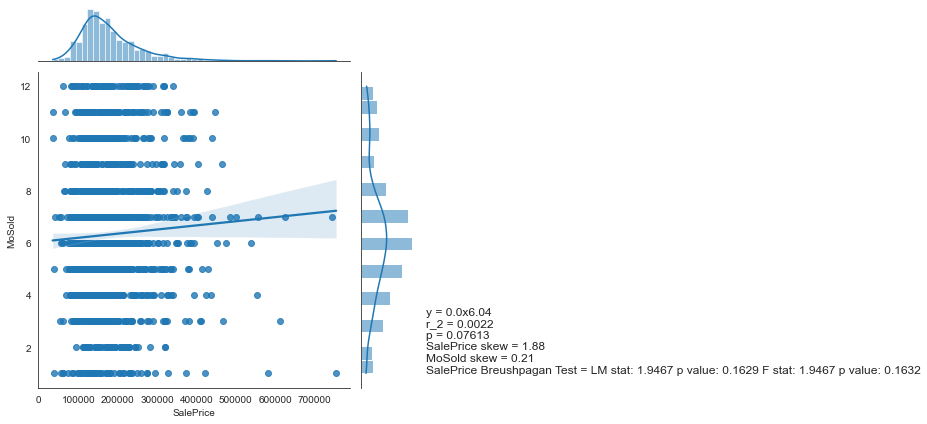

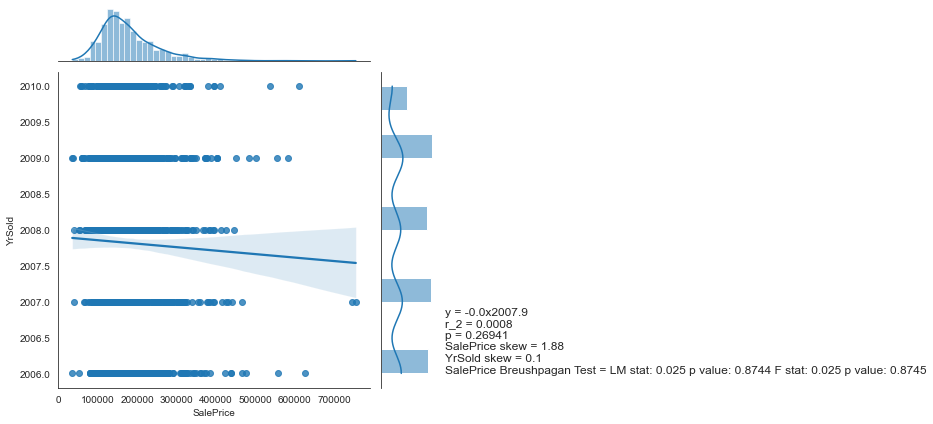

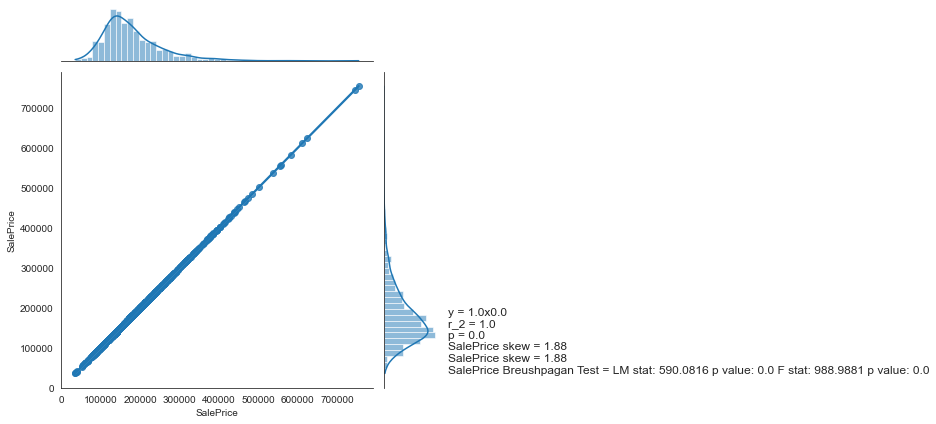

In [11]:
for col in df:
    if pd.api.types.is_numeric_dtype(df[col]):
        ed.scatter(df,col,"SalePrice")

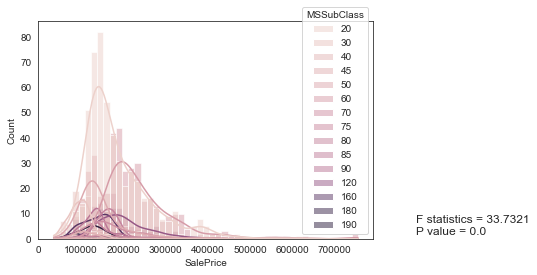

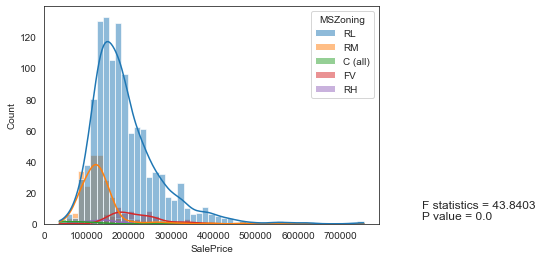

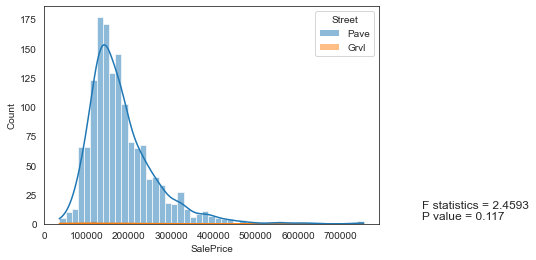

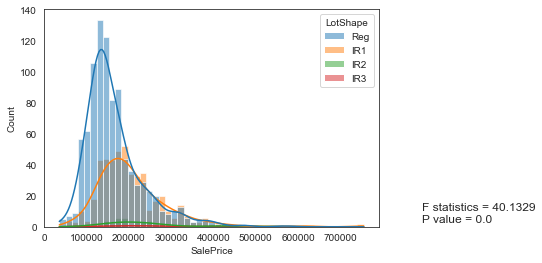

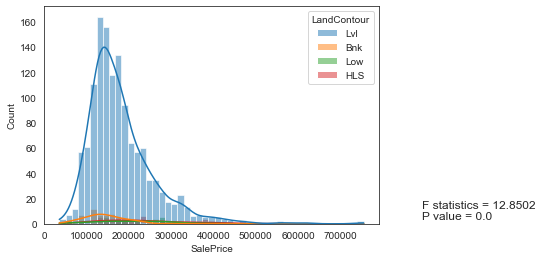

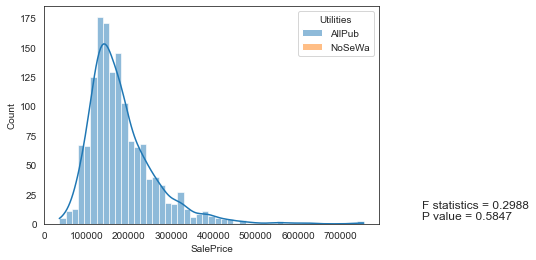

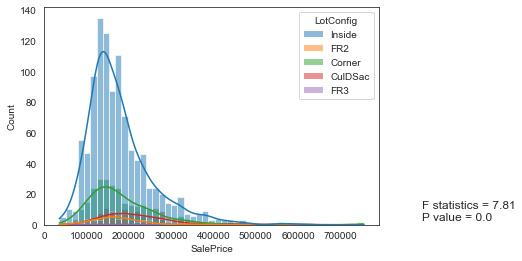

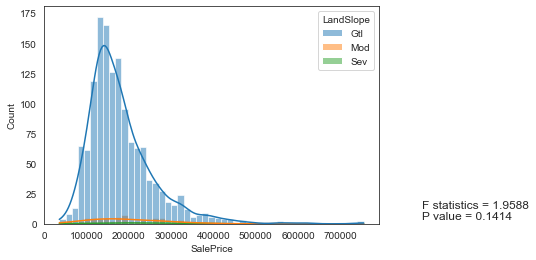

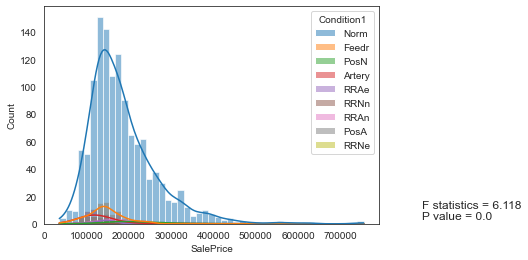

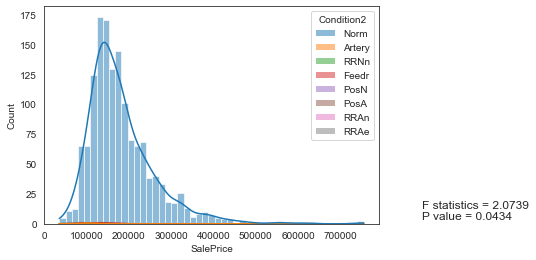

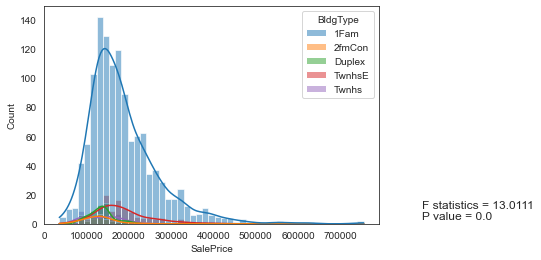

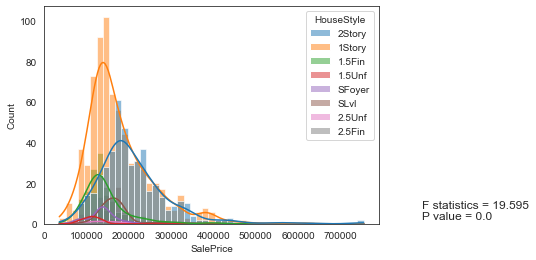

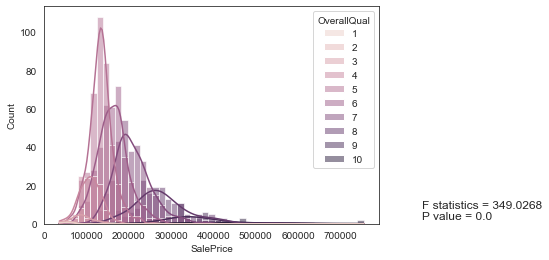

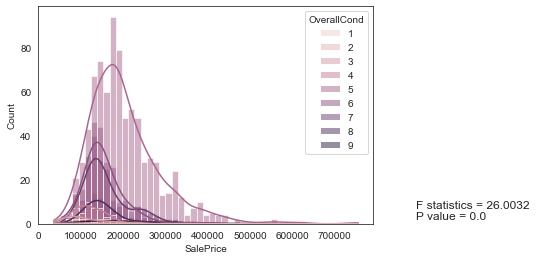

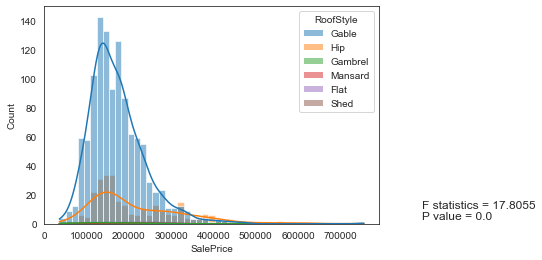

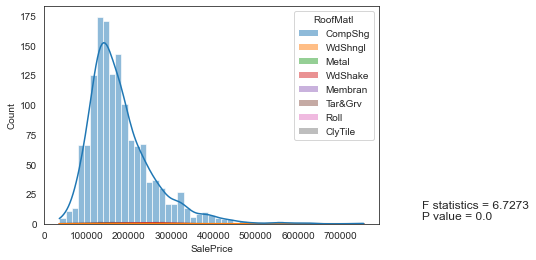

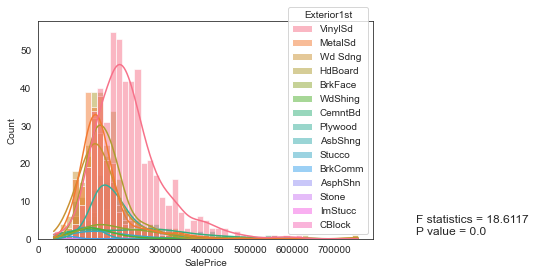

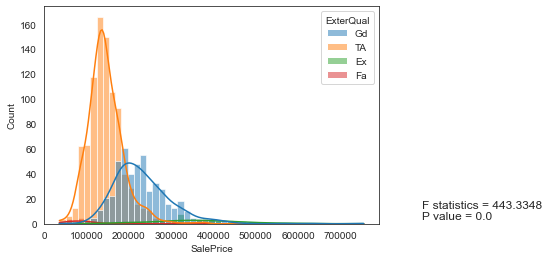

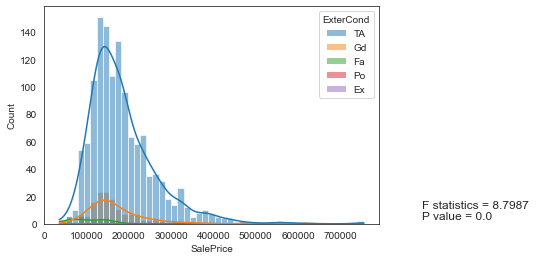

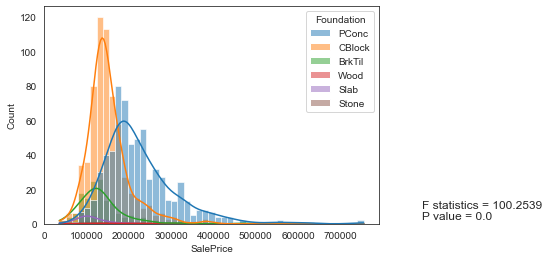

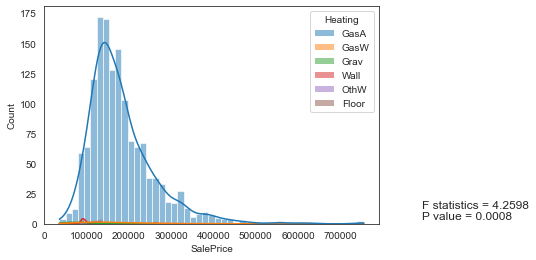

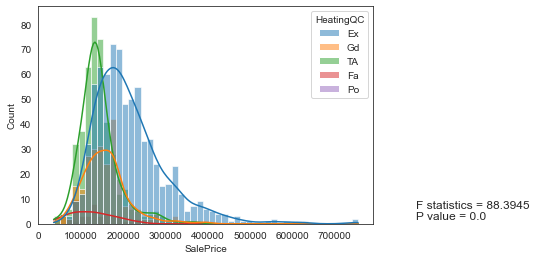

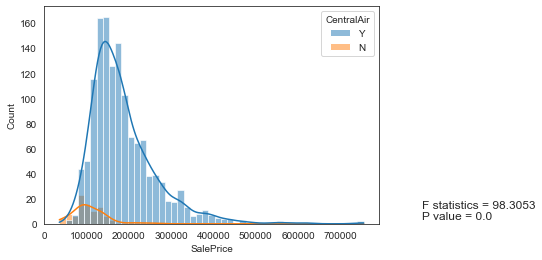

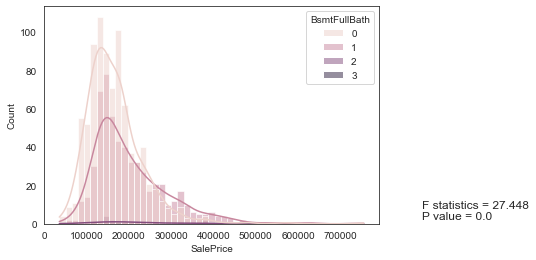

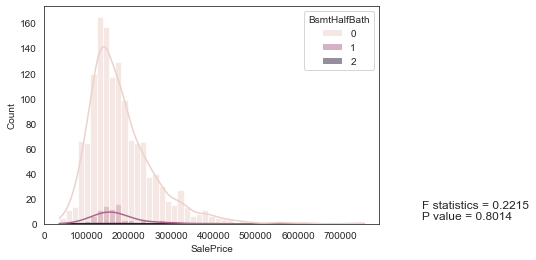

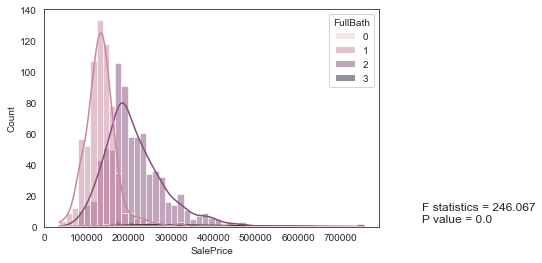

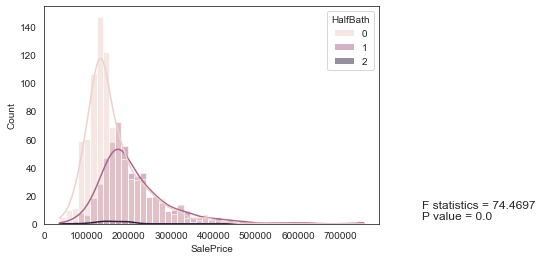

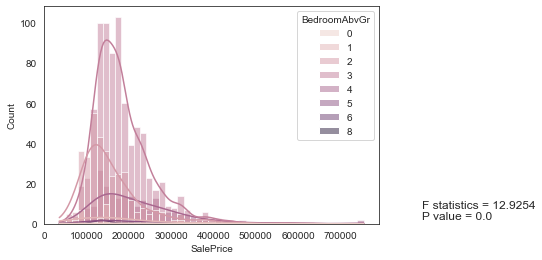

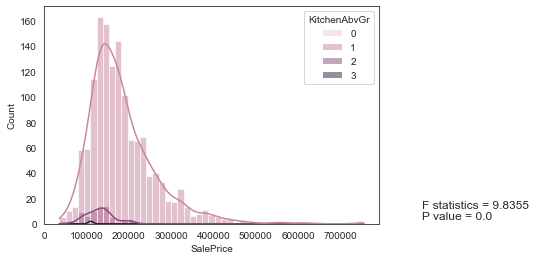

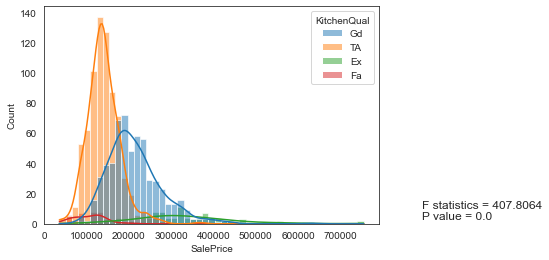

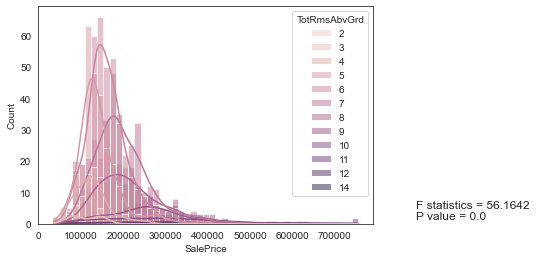

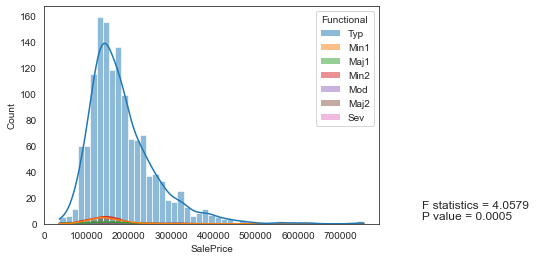

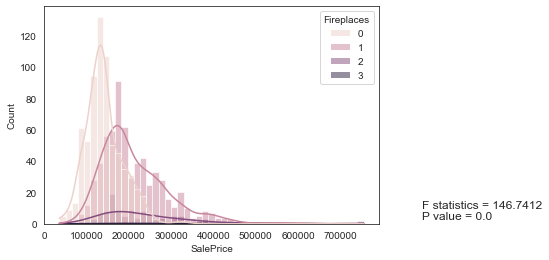

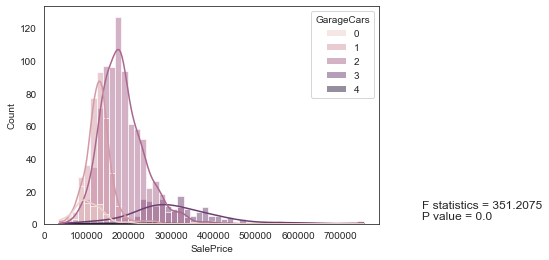

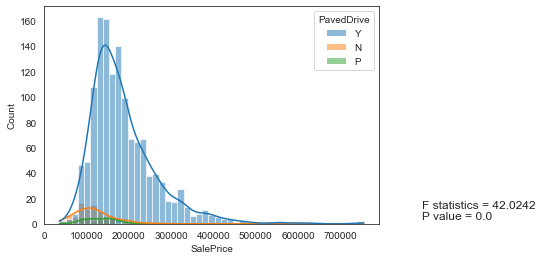

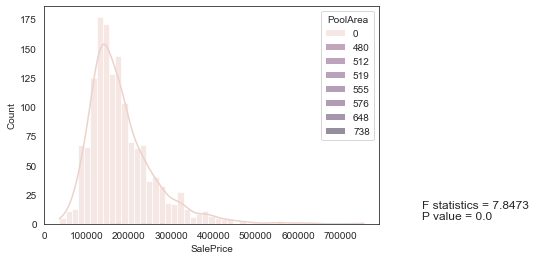

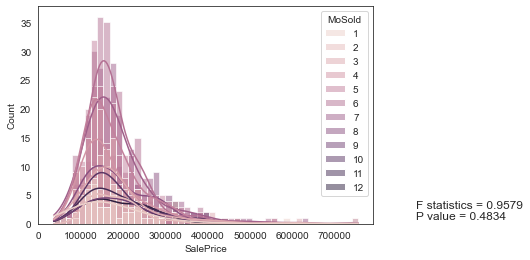

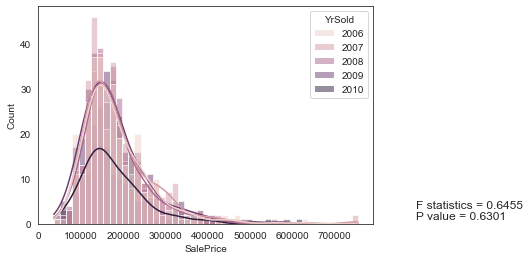

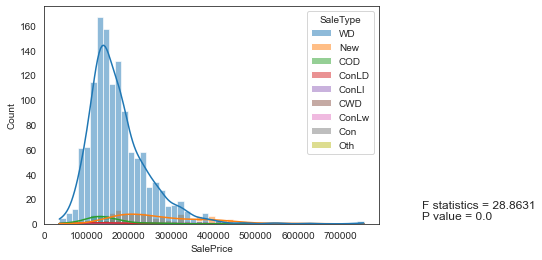

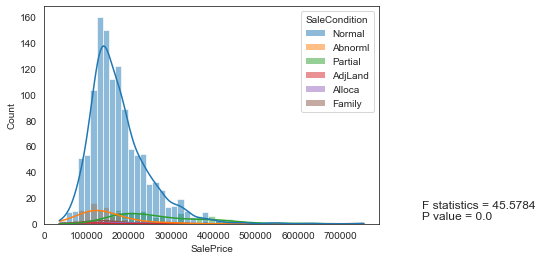

In [12]:
for col in df:
        ed.histogram(df,col,"SalePrice")

C:\Users\yakup\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\yakup\anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\yakup\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\yakup\anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\yakup\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3702: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\yakup\anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeW

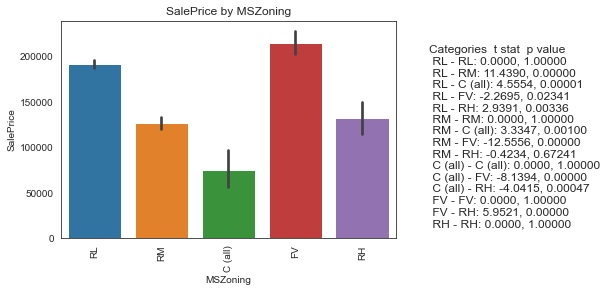

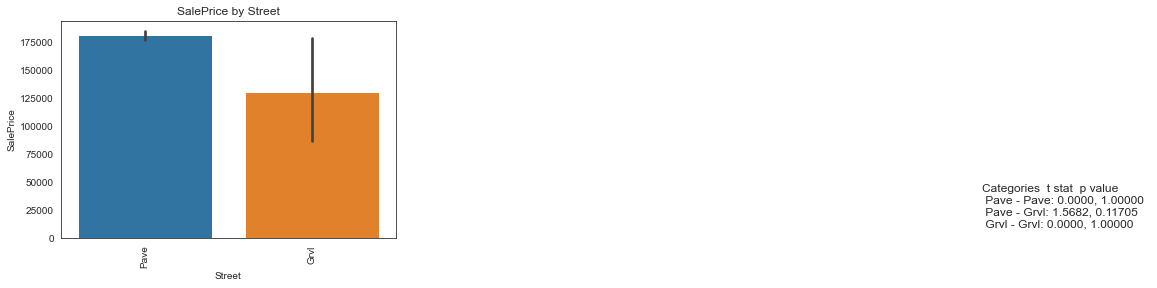

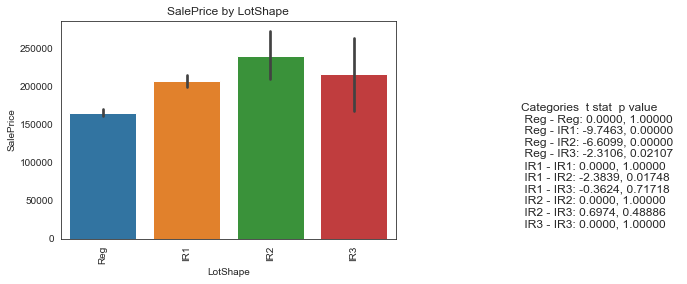

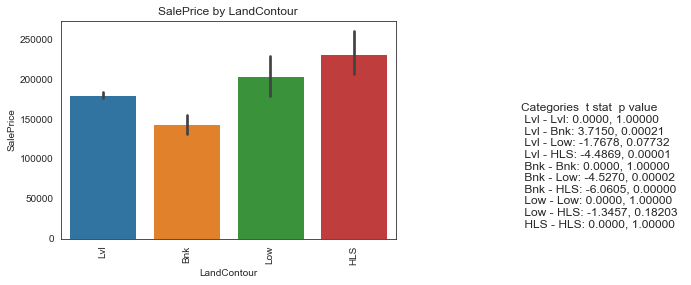

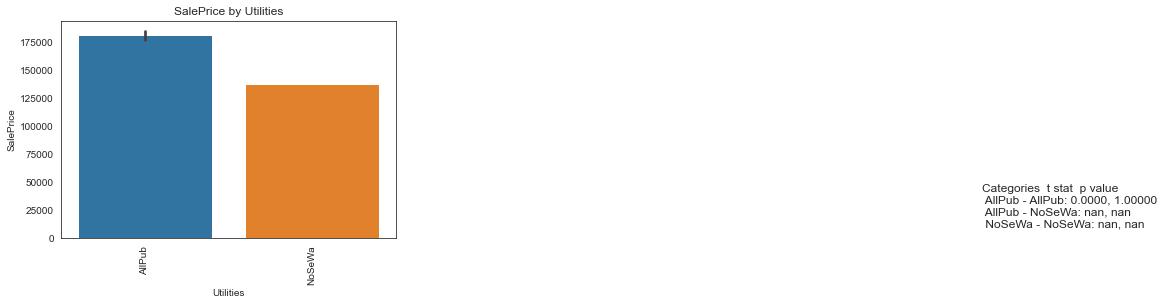

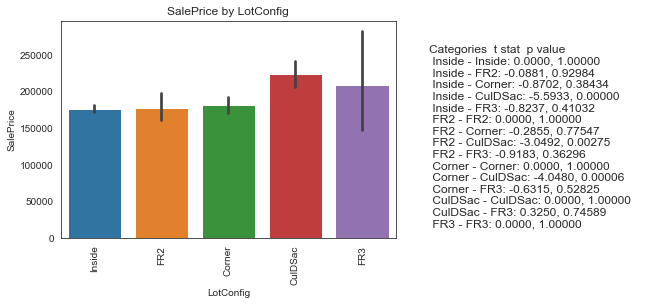

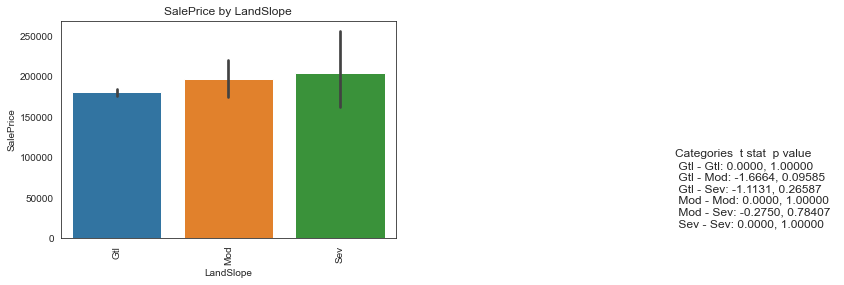

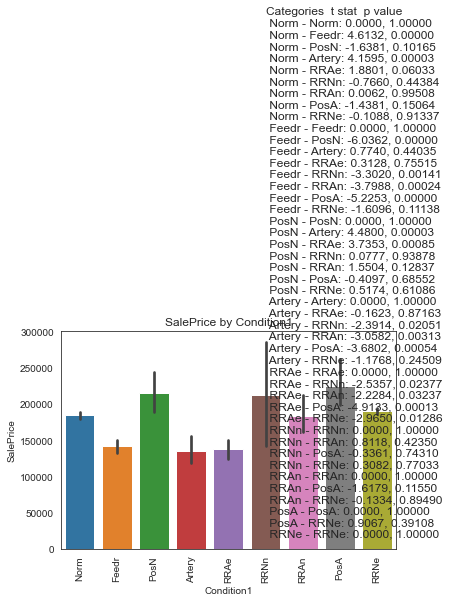

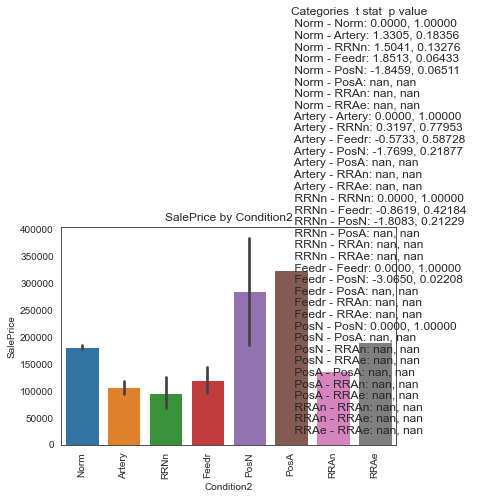

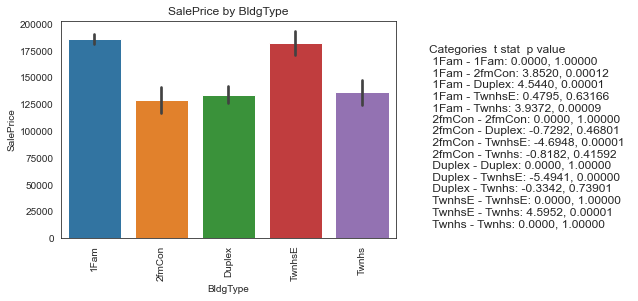

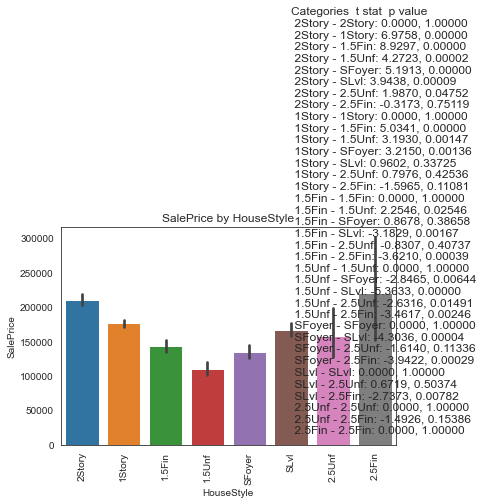

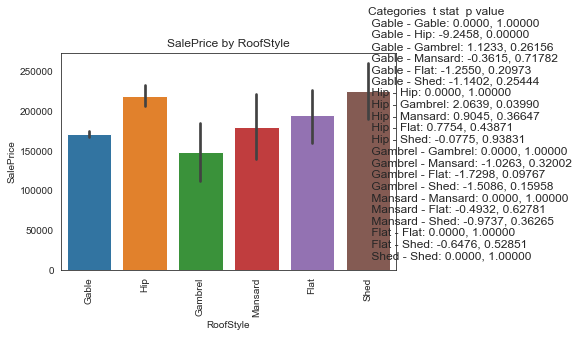

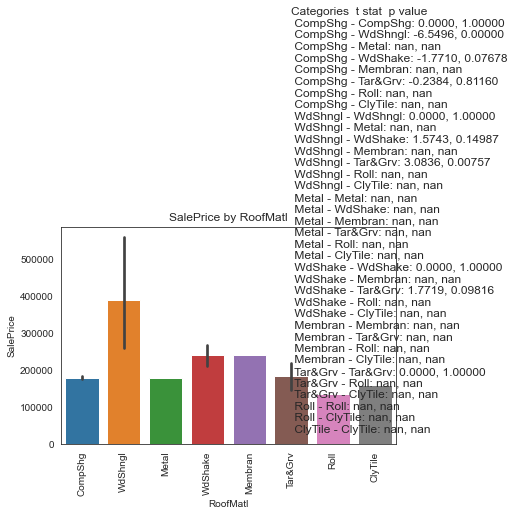

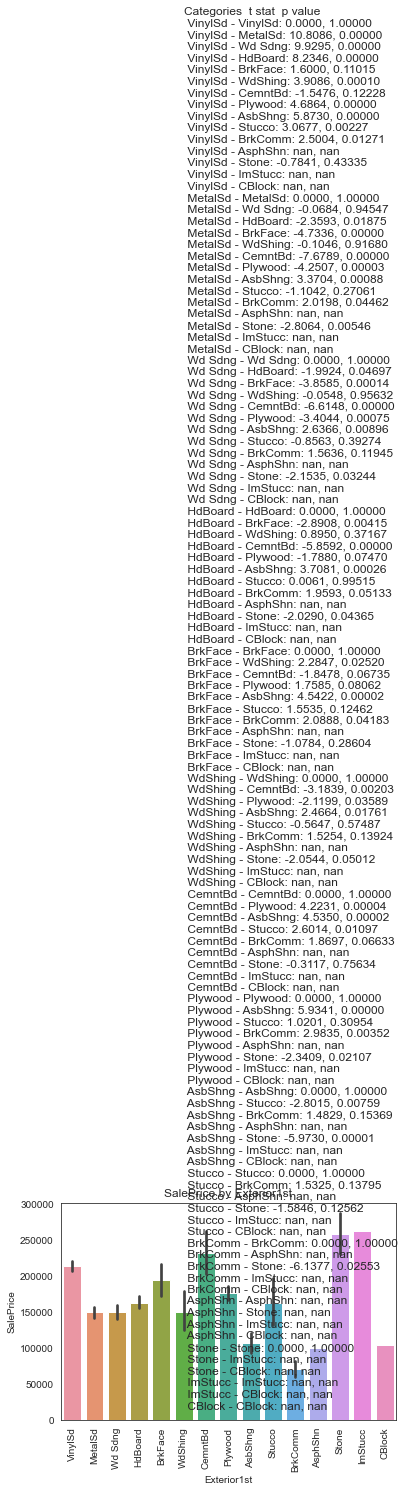

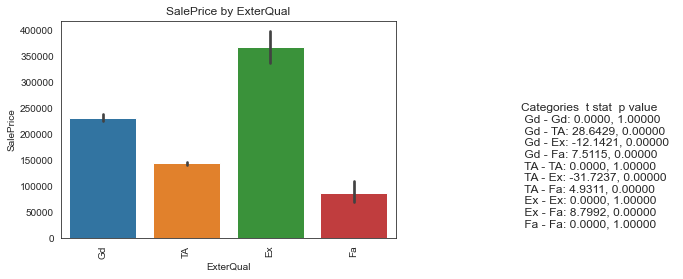

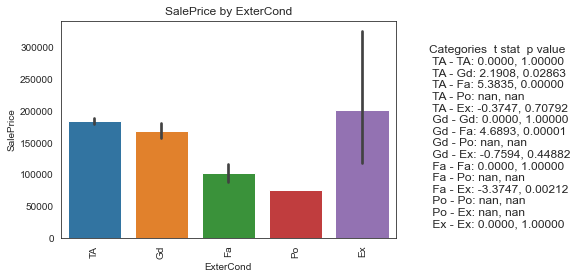

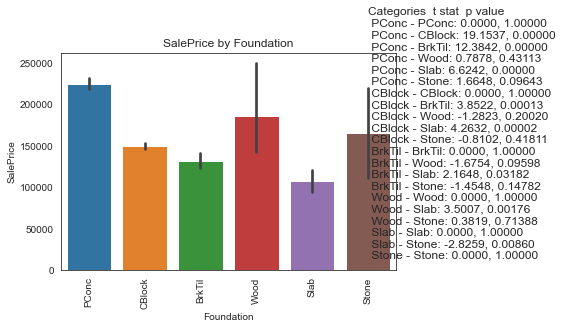

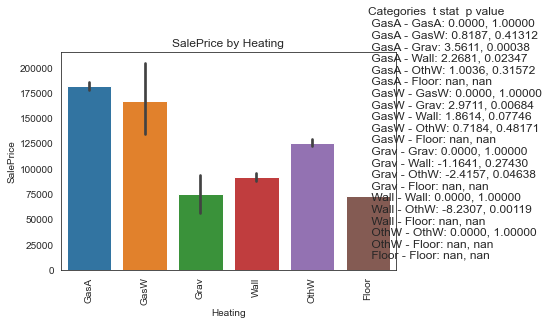

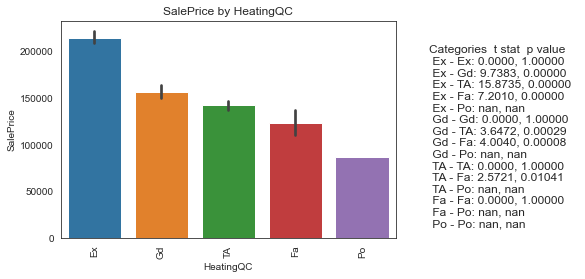

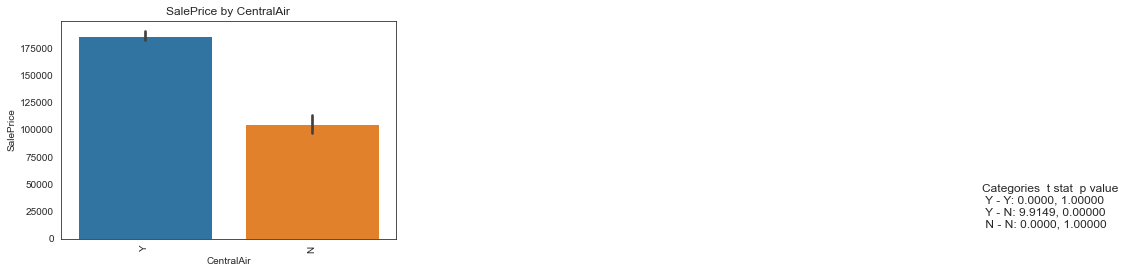

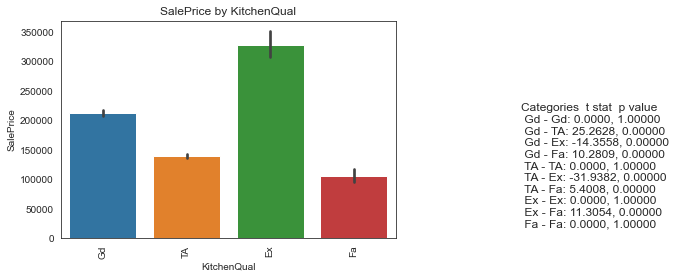

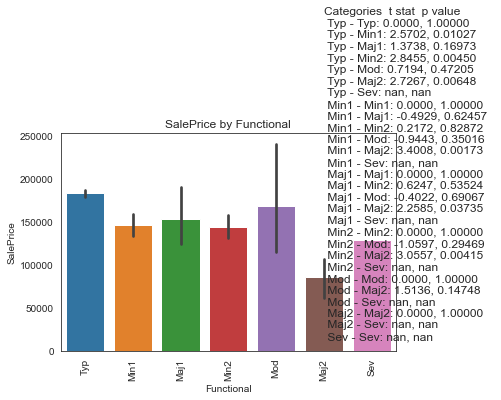

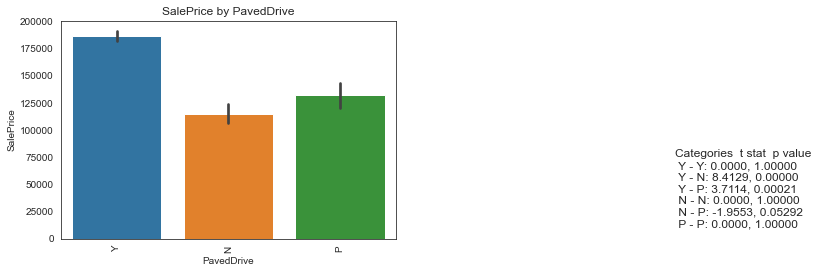

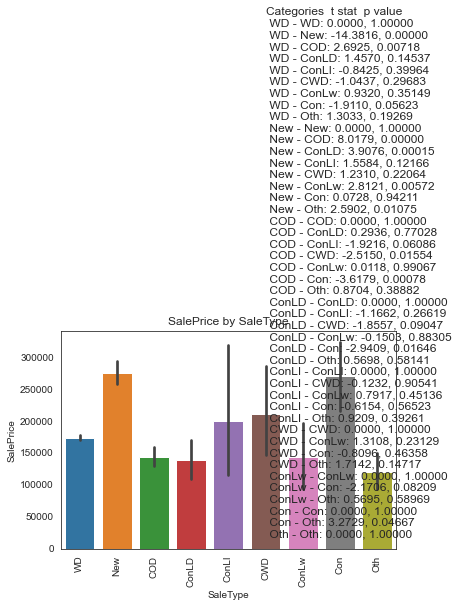

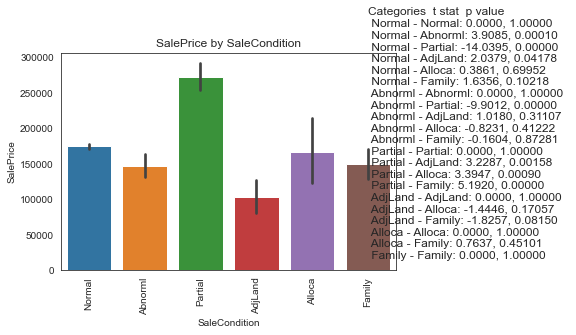

In [13]:
for col in df:
        ed.barplots(df,col,"SalePrice")

In [14]:
for col in df:
    if not pd.api.types.is_numeric_dtype(df[col]):
        df = df.join(pd.get_dummies(df[col], prefix = col, drop_first = False))

In [15]:
df = df.select_dtypes(np.number)
df.drop("Id", axis = 1, inplace= True)
df.head()

MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0          60     8450            7            5       2003          2003   
1          20     9600            6            8       1976          1976   
2          60    11250            7            5       2001          2002   
3          70     9550            7            5       1915          1970   
4          60    14260            8            5       2000          2000   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  A_1stFlrSF  A_2ndFlrSF  \
0         706           0        150          856         856         854   
1         978           0        284         1262        1262           0   
2         486           0        434          920         920         866   
3         216           0        540          756         961         756   
4         655           0        490         1145        1145        1053   

   LowQualFinSF  TotalSF  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0     1710             1             0         2         1   
1             0     1262             0             1         2         0   
2             0     1786             1             0         2         1   
3             0     1717             1             0         1         0   
4             0     2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  \
0             3             1             8           0           2   
1             3             1             6           1           2   
2             3             1             6           1           2   
3             3             1             7           1           3   
4             4             1             9           1           3   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  A_3SsnPorch  \
0         548           0           61              0            0   
1         460         298            0              0            0   
2         608           0           42              0            0   
3         642           0           35            272            0   
4         836         192           84              0            0   

   ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice  \
0            0         0        0       2    2008     208500   
1            0         0        0       5    2007     181500   
2            0         0        0       9    2008     223500   
3            0         0        0       2    2006     140000   
4            0         0        0      12    2008     250000   

   MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0                 0            0            0            1            0   
1                 0            0            0            1            0   
2                 0            0            0            1            0   
3                 0            0            0            1            0   
4                 0            0            0            1            0   

   Street_Grvl  Street_Pave  LotShape_IR1  LotShape_IR2  LotShape_IR3  \
0            0            1             0             0             0   
1            0            1             0             0             0   
2            0            1             1             0             0   
3            0            1             1             0             0   
4            0            1             1             0             0   

   LotShape_Reg  LandContour_Bnk  LandContour_HLS  LandContour_Low  \
0             1                0                0                0   
1             1                0                0                0   
2             0                0                0                0   
3             0                0                0                0   
4             0                0                0                0   

   LandContour_Lvl  Utilities_AllPub  ...  ExterCond_Po  ExterCond_TA  \
0  

In [16]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

In [17]:
df_minmax = pd.DataFrame(scaled_data, columns=df.columns)

In [19]:
df_minmax

MSSubClass   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0       0.235294  0.033420     0.666667        0.500   0.949275      0.883333   
1       0.000000  0.038795     0.555556        0.875   0.753623      0.433333   
2       0.235294  0.046507     0.666667        0.500   0.934783      0.866667   
3       0.294118  0.038561     0.666667        0.500   0.311594      0.333333   
4       0.235294  0.060576     0.777778        0.500   0.927536      0.833333   
...          ...       ...          ...          ...        ...           ...   
1455    0.235294  0.030929     0.555556        0.500   0.920290      0.833333   
1456    0.000000  0.055505     0.555556        0.625   0.768116      0.633333   
1457    0.294118  0.036187     0.666667        1.000   0.500000      0.933333   
1458    0.000000  0.039342     0.444444        0.625   0.565217      0.766667   
1459    0.000000  0.040370     0.444444        0.625   0.673913      0.250000   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  A_1stFlrSF  A_2ndFlrSF  \
0       0.125089    0.000000   0.064212     0.140098    0.119780    0.413559   
1       0.173281    0.000000   0.121575     0.206547    0.212942    0.000000   
2       0.086109    0.000000   0.185788     0.150573    0.134465    0.419370   
3       0.038271    0.000000   0.231164     0.123732    0.143873    0.366102   
4       0.116052    0.000000   0.209760     0.187398    0.186095    0.509927   
...          ...         ...        ...          ...         ...         ...   
1455    0.000000    0.000000   0.407962     0.155974    0.142038    0.336077   
1456    0.139972    0.110583   0.252140     0.252373    0.399036    0.000000   
1457    0.048724    0.000000   0.375428     0.188543    0.195961    0.557869   
1458    0.008682    0.698100   0.000000     0.176432    0.170721    0.000000   
1459    0.147059    0.196744   0.058219     0.205565    0.211565    0.000000   

      LowQualFinSF   TotalSF  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0              0.0  0.259231      0.333333           0.0  0.666667       0.5   
1              0.0  0.174830      0.000000           0.5  0.666667       0.0   
2              0.0  0.273549      0.333333           0.0  0.666667       0.5   
3              0.0  0.260550      0.333333           0.0  0.333333       0.0   
4              0.0  0.351168      0.333333           0.0  0.666667       0.5   
...            ...       ...           ...           ...       ...       ...   
1455           0.0  0.247362      0.000000           0.0  0.666667       0.5   
1456           0.0  0.327619      0.333333           0.0  0.666667       0.0   
1457           0.0  0.377920      0.000000           0.0  0.666667       0.0   
1458           0.0  0.140166      0.333333           0.0  0.333333       0.0   
1459           0.0  0.173700      0.333333           0.0  0.333333       0.5   

      BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  \
0            0.375      0.333333      0.500000    0.000000        0.50   
1            0.375      0.333333      0.333333    0.333333        0.50   
2            0.375      0.333333      0.333333    0.333333        0.50   
3            0.375      0.333333      0.416667    0.333333        0.75   
4            0.500      0.333333      0.583333    0.333333        0.75   
...            ...           ...           ...         ...         ...   
1455         0.375      0.333333      0.416667    0.333333        0.50   
1456         0.375      0.333333      0.416667    0.666667        0.50   
1457         0.500      0.333333      0.583333    0.666667        0.25   
1458         0.250      0.333333      0.250000    0.000000        0.25   
1459         0.375      0.333333      0.333333    0.000000        0.25   

      GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  A_3SsnPorch  \
0       0.386460    0.000000     0.111517       0.000000          0.0   
1       0.324401    0.347725     0.000000       0.000000          0.0   
2  

In [20]:
label = "SalePrice"
y = df[label]
x = df.drop(axis =1,labels=[label])
x.head()

results = sm.OLS(y,x).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     79.79
Date:                Thu, 13 Jul 2023   Prob (F-statistic):               0.00
Time:                        23:23:03   Log-Likelihood:                -16695.
No. Observations:                1460   AIC:                         3.376e+04
Df Residuals:                    1274   BIC:                         3.475e+04
Df Model:                         185                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
MSSubClass               -9.7062     85.213     -0.114      0.909    -176.880     157.467
LotArea                   0.7020      0.108      6.511      0.000       0.490       0.914
OverallQual            7995.0504   1016.388      7.866      0.000    6001.071    9989.030
OverallCond            5377.8889    868.955      6.189      0.000    3673.149    7082.629
YearBuilt               325.5002     73.420      4.433      0.000     181.464     469.537
YearRemodAdd            104.8320     55.198      1.899      0.058      -3.457     213.121
BsmtFinSF1               17.9311      2.069      8.667      0.000      13.872      21.990
BsmtFinSF2                5.3754      3.450      1.558      0.119      -1.393      12.144
BsmtUnfSF                -4.1836      1.987     -2.105      0.035      -8.082      -0.285
TotalBsmtSF              19.1225      3.137      6.096      0.000      12.969      25.276
A_1stFlrSF               17.7088      6.015      2.944      0.003       5.908      29.510
A_2ndFlrSF               32.6119      5.371      6.072      0.000      22.075      43.149
LowQualFinSF            -12.8943     13.653     -0.944      0.345     -39.680      13.891
TotalSF                  37.4267      5.459      6.855      0.000      26.716      48.137
BsmtFullBath           1544.3255   1963.516      0.787      0.432   -2307.754    5396.406
BsmtHalfBath            370.4441   3108.148      0.119      0.905   -5727.206    6468.094
FullBath               2525.0854   2236.017      1.129      0.259   -1861.596    6911.767
HalfBath               -149.2172   2131.489     -0.070      0.944   -4330.831    4032.396
BedroomAbvGr          -5492.6127   1377.551     -3.987      0.000   -8195.131   -2790.094
KitchenAbvGr          -1.589e+04   5716.765     -2.780      0.006   -2.71e+04   -4677.082
TotRmsAbvGrd           1366.0063    972.579      1.405      0.160    -542.026    3274.038
Fireplaces             2758.2809   1368.941      2.015      0.044      72.655    5443.907
GarageCars             4296.1362   2215.722      1.939      0.053     -50.730    8643.002
GarageArea               13.1261      7.612      1.724      0.085      -1.807      28.059
WoodDeckSF               13.6075      5.943      2.290      0.022       1.948      25.267
OpenPorchSF              12.2324     11.797      1.037      0.300     -10.911      35.376
EnclosedPorch             5.3769     12.768      0.421      0.674     -19.671      30.425
A_3SsnPorch              24.0018     23.079      1.040      0.299     -21.275      69.278
ScreenPorch              37.0246     12.567      2.946      0.003      12.371      61.678
PoolArea                 71.3912     18.279      3.906      0.000      35.532     107.251
MiscVal                  -0.3282      1.466     -0.224      0.823      -3.203       2.547
MoSold                 

In [21]:
df_features = pd.DataFrame({"coef":results.params, "t": abs(results.tvalues), "p":round(results.pvalues, 5)})
df_features.sort_values(by = ["t","p"],inplace=True)
dropped = list(df_features[df_features["p"] <= 0.05].T.columns)
dropped.append("SalePrice")

In [22]:
dropped

['Neighborhood_Gilbert',
 'Fireplaces',
 'Functional_Sev',
 'BsmtUnfSF',
 'Condition2_RRAe',
 'Neighborhood_NAmes',
 'Exterior1st_ImStucc',
 'WoodDeckSF',
 'Neighborhood_Edwards',
 'MoSold',
 'Neighborhood_NridgHt',
 'RoofMatl_Metal',
 'Neighborhood_Mitchel',
 'KitchenAbvGr',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'A_1stFlrSF',
 'ScreenPorch',
 'RoofMatl_Membran',
 'Neighborhood_StoneBr',
 'PoolArea',
 'BedroomAbvGr',
 'YearBuilt',
 'RoofMatl_WdShngl',
 'A_2ndFlrSF',
 'TotalBsmtSF',
 'OverallCond',
 'LotArea',
 'Condition2_PosN',
 'TotalSF',
 'OverallQual',
 'BsmtFinSF1',
 'RoofMatl_ClyTile',
 'SalePrice']

In [23]:
label = "SalePrice"
y = df[label]
x = df[dropped].drop("SalePrice", axis = 1)

results = sm.OLS(y,x).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.976
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              1748.
Date:                Thu, 13 Jul 2023   Prob (F-statistic):                        0.00
Time:                        23:23:08   Log-Likelihood:                         -17156.
No. Observations:                1460   AIC:                                  3.438e+04
Df Residuals:                    1427   BIC:                                  3.455e+04
Df Model:                          33                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Neighborhood_Gilbert  1.092e+04   3853.813      2.832      0.005    3355.413    1.85e+04
Fireplaces            -157.5605   1583.231     -0.100      0.921   -3263.270    2948.149
Functional_Sev       -9.301e+04   3.15e+04     -2.957      0.003   -1.55e+05   -3.13e+04
BsmtUnfSF                0.8482      5.413      0.157      0.876      -9.769      11.466
Condition2_RRAe      -1.837e+04   3.14e+04     -0.585      0.559      -8e+04    4.33e+04
Neighborhood_NAmes   -5979.9553   2524.817     -2.368      0.018   -1.09e+04   -1027.205
Exterior1st_ImStucc  -4.144e+04   3.16e+04     -1.312      0.190   -1.03e+05    2.05e+04
WoodDeckSF              16.6833      7.082      2.356      0.019       2.792      30.575
Neighborhood_Edwards -7972.7977   3458.793     -2.305      0.021   -1.48e+04   -1187.932
MoSold                -590.2282    304.322     -1.939      0.053   -1187.194       6.738
Neighborhood_NridgHt  5.023e+04   4137.413     12.139      0.000    4.21e+04    5.83e+04
RoofMatl_Metal        1.384e+04   3.13e+04      0.442      0.658   -4.75e+04    7.52e+04
Neighborhood_Mitchel -4570.3764   4672.688     -0.978      0.328   -1.37e+04    4595.698
KitchenAbvGr         -2.638e+04   4102.669     -6.430      0.000   -3.44e+04   -1.83e+04
Neighborhood_NWAmes  -1.499e+04   3916.952     -3.828      0.000   -2.27e+04   -7308.830
Neighborhood_NoRidge  3.564e+04   5517.666      6.458      0.000    2.48e+04    4.65e+04
A_1stFlrSF             104.3868     17.829      5.855      0.000      69.413     139.361
ScreenPorch             26.9400     15.215      1.771      0.077      -2.906      56.786
RoofMatl_Membran      2.521e+04   3.17e+04      0.795      0.427    -3.7e+04    8.74e+04
Neighborhood_StoneBr  4.224e+04   6618.634      6.382      0.000    2.93e+04    5.52e+04
PoolArea                63.3580     21.729      2.916      0.004      20.734     105.982
BedroomAbvGr         -6874.2581   1338.943     -5.134      0.000   -9500.766   -4247.750
YearBuilt              -23.2525      4.372     -5.318      0.000     -31.829     -14.676
RoofMatl_WdShngl      5.805e+04   1.32e+04      4.402      0.000    3.22e+04    8.39e+04
A_2ndFlrSF              94.4088     17.472      5.403      0.000      60.135     128.682
TotalBsmtSF             21.3416      6.221      3.430      0.001       9.138      33.545
OverallCond           2297.4069    745.995      3.080      0.002     834.043    3760.771
LotArea                  0.5339      0.090      5.935      0.000       0.357       0.710
Condition2_PosN      -2.034e+05   2.27e+04     -8.953      0.000   -2.48e+05   -1.59e+05
TotalSF                -31.0469     17.162     -1.809      0.071     -64.712       2.618
OverallQual            1.87e+04    971.157     

In [24]:
df_test = pd.read_csv("test.csv")

In [25]:
df_test.dropna(axis=1, inplace=True)
df_test.columns = df_test.columns.str.strip()
ed.df_problem_solver1(df_test)

In [26]:
for col in df_test:
    if not pd.api.types.is_numeric_dtype(df_test[col]):
        df_test = df_test.join(pd.get_dummies(df_test[col], prefix = col, drop_first = False))

In [27]:
df_test = df_test.select_dtypes(np.number)

In [28]:
for i in ['Functional_Sev', 'BsmtUnfSF', 'Condition2_RRAe', 'Exterior1st_ImStucc', 'RoofMatl_Metal', 'RoofMatl_Membran', 'TotalBsmtSF', 'TotalSF', 'BsmtFinSF1', 'RoofMatl_ClyTile', 'SalePrice']:
    dropped.remove(i)

In [29]:
df_test[dropped]

Neighborhood_Gilbert  Fireplaces  Neighborhood_NAmes  WoodDeckSF  \
0                        0           0                   1         140   
1                        0           0                   1         393   
2                        1           1                   0         212   
3                        1           1                   0         360   
4                        0           0                   0           0   
...                    ...         ...                 ...         ...   
1454                     0           0                   0           0   
1455                     0           0                   0           0   
1456                     0           1                   0         474   
1457                     0           0                   0          80   
1458                     0           1                   0         190   

      Neighborhood_Edwards  MoSold  Neighborhood_NridgHt  \
0                        0       6                     0   
1                        0       6                     0   
2                        0       3                     0   
3                        0       6                     0   
4                        0       1                     0   
...                    ...     ...                   ...   
1454                     0       6                     0   
1455                     0       4                     0   
1456                     0       9                     0   
1457                     0       7                     0   
1458                     0      11                     0   

      Neighborhood_Mitchel  KitchenAbvGr  Neighborhood_NWAmes  \
0                        0             1                    0   
1                        0             1                    0   
2                        0             1                    0   
3                        0             1                    0   
4                        0             1                    0   
...                    ...           ...                  ...   
1454                     0             1                    0   
1455                     0             1                    0   
1456                     1             1                    0   
1457                     1             1                    0   
1458                     1             1                    0   

      Neighborhood_NoRidge  A_1stFlrSF  ScreenPorch  Neighborhood_StoneBr  \
0                        0         896          120                     0   
1                        0        1329            0                     0   
2                        0         928            0                     0   
3                        0         926            0                     0   
4                        0        1280          144                     1   
...                    ...         ...          ...                   ...   
1454                     0         546            0                     0   
1455                     0         546            0                     0   
1456                     0        1224            0                     0   
1457                     0         970            0                     0   
1458                     0         996            0                     0   

      PoolArea  BedroomAbvGr  YearBuilt  RoofMatl_WdShngl  A_2ndFlrSF  \
0            0             2       1961                 0           0   
1            0             3       1958                 0           0   
2            0             3       1997                 0         701   
3            0             3       1998                 0         678   
4            0             2       1992                 0           0   
...        ...           ...        ...               ...         ...   
1454         0             3       1970                 0         546   
1455         0             3       1970                 0         546   
1456         0             4     

In [30]:
df_test.drop("Id", axis = 1, inplace=True)

In [31]:
label = "SalePrice"
y = df[label]
x = df[dropped]

results = sm.OLS(y,x).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.968
Method:                 Least Squares   F-statistic:                              1900.
Date:                Thu, 13 Jul 2023   Prob (F-statistic):                        0.00
Time:                        23:23:27   Log-Likelihood:                         -17358.
No. Observations:                1460   AIC:                                  3.476e+04
Df Residuals:                    1437   BIC:                                  3.488e+04
Df Model:                          23                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Neighborhood_Gilbert  6354.3349   4388.547      1.448      0.148   -2254.309     1.5e+04
Fireplaces            2205.2815   1788.687      1.233      0.218   -1303.437    5714.000
Neighborhood_NAmes   -4472.5199   2849.861     -1.569      0.117   -1.01e+04    1117.814
WoodDeckSF              33.8192      7.996      4.229      0.000      18.133      49.505
Neighborhood_Edwards -1.346e+04   3913.304     -3.439      0.001   -2.11e+04   -5782.387
MoSold                -550.7208    347.210     -1.586      0.113   -1231.813     130.371
Neighborhood_NridgHt  5.811e+04   4701.870     12.359      0.000    4.89e+04    6.73e+04
Neighborhood_Mitchel  2407.0880   5312.609      0.453      0.651   -8014.211    1.28e+04
KitchenAbvGr         -2.866e+04   4614.988     -6.209      0.000   -3.77e+04   -1.96e+04
Neighborhood_NWAmes   -1.08e+04   4460.610     -2.420      0.016   -1.95e+04   -2045.816
Neighborhood_NoRidge   5.32e+04   6143.842      8.659      0.000    4.11e+04    6.53e+04
A_1stFlrSF              80.3615      3.946     20.363      0.000      72.620      88.103
ScreenPorch             49.0415     17.291      2.836      0.005      15.123      82.960
Neighborhood_StoneBr  5.294e+04   7546.959      7.014      0.000    3.81e+04    6.77e+04
PoolArea               -25.7152     23.833     -1.079      0.281     -72.466      21.035
BedroomAbvGr         -5645.9184   1488.435     -3.793      0.000   -8565.656   -2726.181
YearBuilt              -17.4075      4.970     -3.502      0.000     -27.157      -7.658
RoofMatl_WdShngl      6.529e+04   1.49e+04      4.371      0.000     3.6e+04    9.46e+04
A_2ndFlrSF              49.9905      3.394     14.731      0.000      43.333      56.647
OverallCond           1546.1046    846.104      1.827      0.068    -113.627    3205.836
LotArea                  0.5700      0.102      5.602      0.000       0.370       0.770
Condition2_PosN        -1.5e+05   2.58e+04     -5.809      0.000   -2.01e+05   -9.94e+04
OverallQual           2.141e+04   1063.231     20.141      0.000    1.93e+04    2.35e+04
==============================================================================
Omnibus:                      402.145   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25558.918
Skew:                          -0.334   Prob(JB):                         0.00
Kurtosis:                      23.487   Cond. No.                     4.06e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[

In [32]:
predictions = results.predict(df_test[dropped])

In [33]:
pred_df = pd.DataFrame([np.arange(1461,2920, dtype = np.int16),predictions]).T

In [34]:
pred_df.columns = ["Id","SalePrice"]

In [35]:
pred_df["Id"] = pred_df.Id.astype(int)

In [36]:
pred_df

Id      SalePrice
0     1461  123737.987985
1     1462  178534.626102
2     1463  166027.002322
3     1464  188817.621707
4     1465  269590.737725
...    ...            ...
1454  2915   85566.863703
1455  2916   83552.157026
1456  2917  157986.898880
1457  2918  119694.698192
1458  2919  218045.504890

[1459 rows x 2 columns]

In [37]:
pred_df.to_csv("Predictions.csv",index = False)

In [38]:
def cleaner(dataframe):
    import eda as ed
    dataframe.dropna(axis=1, inplace=True)
    dataframe.columns = dataframe.columns.str.strip()
    ed.df_problem_solver1(dataframe)
    return dataframe

In [39]:
def dummy(dataframe):
    for col in dataframe:
        if not pd.api.types.is_numeric_dtype(dataframe[col]):
            dataframe = dataframe.join(pd.get_dummies(dataframe[col], prefix = col, drop_first = True))
    dataframe = dataframe.select_dtypes(np.number)
    return dataframe

In [40]:
def regression(dataframe,target):   
    y = dataframe[target]
    x = dataframe.drop(target, axis = 1).assign(const=1)
    results = sm.OLS(y,x).fit()
    return results

In [41]:
def regression_stats_df(results):
    df_stats = pd.DataFrame({"coef":results.params, "t":abs(results.tvalues), "p":results.pvalues})
    #df_stats.drop("const", axis=1, inplace = True)
    df_stats = df_stats.sort_values(by = ["t","p"])
    return df_stats

In [42]:
cleaner(df)


MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0             60     8450            7            5       2003          2003   
1             20     9600            6            8       1976          1976   
2             60    11250            7            5       2001          2002   
3             70     9550            7            5       1915          1970   
4             60    14260            8            5       2000          2000   
...          ...      ...          ...          ...        ...           ...   
1455          60     7917            6            5       1999          2000   
1456          20    13175            6            6       1978          1988   
1457          70     9042            7            9       1941          2006   
1458          20     9717            5            6       1950          1996   
1459          20     9937            5            6       1965          1965   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  A_1stFlrSF  A_2ndFlrSF  \
0            706           0        150          856         856         854   
1            978           0        284         1262        1262           0   
2            486           0        434          920         920         866   
3            216           0        540          756         961         756   
4            655           0        490         1145        1145        1053   
...          ...         ...        ...          ...         ...         ...   
1455           0           0        953          953         953         694   
1456         790         163        589         1542        2073           0   
1457         275           0        877         1152        1188        1152   
1458          49        1029          0         1078        1078           0   
1459         830         290        136         1256        1256           0   

      LowQualFinSF  TotalSF  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0                0     1710             1             0         2         1   
1                0     1262             0             1         2         0   
2                0     1786             1             0         2         1   
3                0     1717             1             0         1         0   
4                0     2198             1             0         2         1   
...            ...      ...           ...           ...       ...       ...   
1455             0     1647             0             0         2         1   
1456             0     2073             1             0         2         0   
1457             0     2340             0             0         2         0   
1458             0     1078             1             0         1         0   
1459             0     1256             1             0         1         1   

      BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  \
0                3             1             8           0           2   
1                3             1             6           1           2   
2                3             1             6           1           2   
3                3             1             7           1           3   
4                4             1             9           1           3   
...            ...           ...           ...         ...         ...   
1455             3             1             7           1           2   
1456             3             1             7           2           2   
1457             4             1             9           2           1   
1458             2             1             5           0           1   
1459             3             1             6           0           1   

      GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  A_3SsnPorch  \
0            548           0           61              0            0   
1            460         298            0              0            0   
2            608           

In [43]:
dummy(cleaner(df))

MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0             60     8450            7            5       2003          2003   
1             20     9600            6            8       1976          1976   
2             60    11250            7            5       2001          2002   
3             70     9550            7            5       1915          1970   
4             60    14260            8            5       2000          2000   
...          ...      ...          ...          ...        ...           ...   
1455          60     7917            6            5       1999          2000   
1456          20    13175            6            6       1978          1988   
1457          70     9042            7            9       1941          2006   
1458          20     9717            5            6       1950          1996   
1459          20     9937            5            6       1965          1965   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  A_1stFlrSF  A_2ndFlrSF  \
0            706           0        150          856         856         854   
1            978           0        284         1262        1262           0   
2            486           0        434          920         920         866   
3            216           0        540          756         961         756   
4            655           0        490         1145        1145        1053   
...          ...         ...        ...          ...         ...         ...   
1455           0           0        953          953         953         694   
1456         790         163        589         1542        2073           0   
1457         275           0        877         1152        1188        1152   
1458          49        1029          0         1078        1078           0   
1459         830         290        136         1256        1256           0   

      LowQualFinSF  TotalSF  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0                0     1710             1             0         2         1   
1                0     1262             0             1         2         0   
2                0     1786             1             0         2         1   
3                0     1717             1             0         1         0   
4                0     2198             1             0         2         1   
...            ...      ...           ...           ...       ...       ...   
1455             0     1647             0             0         2         1   
1456             0     2073             1             0         2         0   
1457             0     2340             0             0         2         0   
1458             0     1078             1             0         1         0   
1459             0     1256             1             0         1         1   

      BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  \
0                3             1             8           0           2   
1                3             1             6           1           2   
2                3             1             6           1           2   
3                3             1             7           1           3   
4                4             1             9           1           3   
...            ...           ...           ...         ...         ...   
1455             3             1             7           1           2   
1456             3             1             7           2           2   
1457             4             1             9           2           1   
1458             2             1             5           0           1   
1459             3             1             6           0           1   

      GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  A_3SsnPorch  \
0            548           0           61              0            0   
1            460         298            0              0            0   
2            608           

In [45]:
regression_stats_df(regression(dummy(cleaner(df)),"SalePrice"))

coef          t             p
Functional_Min2        -276.243110   0.011838  9.905565e-01
Condition1_Norm        -401.743412   0.022756  9.818481e-01
Exterior2nd_CmentBd     776.184394   0.042541  9.660743e-01
HouseStyle_1.5Unf     -1157.634802   0.055992  9.553566e-01
HalfBath               -149.217197   0.070006  9.441998e-01
...                            ...        ...           ...
TotalSF                  37.426571   6.855403  1.105248e-11
Condition2_PosN     -195136.751620   7.224654  8.623885e-13
OverallQual            7995.050381   7.866136  7.753797e-15
BsmtFinSF1               17.931097   8.666599  1.329295e-17
RoofMatl_ClyTile    -604564.390348  16.199933  8.208252e-54

[216 rows x 3 columns]

def regression_step(dataframe, target, min=2):
    df_models = pd.DataFrame(column=["r_2","r_2a","diff","RMSE", "MAE","Features"])
    
    df = dummier(cleaner(dataframe))
    
    results = regression(dataframe, target)
    
    df_models.loc[str(len(results.params))] = regression_stats(results, df[target], 10)
    
    df_features = regression_step(re)
    
